In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Перед нами стоит задача кластеризации для датасета химического состава керамики. 

Данный датасет содержит информацию о химическом составе керамических образцов. Данные были получены с помощью метода волновой дисперсии рентгеновской флуоресценции, который позволяет анализировать элементный состав материалов. Каждый образец в датасете представлен в виде набора количественных признаков, соответствующих концентрациям различных элементов, таких как Na, Mg, Al, Si и др.

Сначала выполним загрузку данных и первичный анализ. Проверку на наличие пропущенных значений.
Стандартизацию данных, так как алгоритмы кластеризации чувствительны к масштабу признаков.

Реализуем метрику анализ силуэта для оценки качества кластеризации.

Реализуем и применим методы K-means++ и DBSCAN c проверкой по метрике.

Сделаем вывод о полученных кластерах.

In [2]:
df = pd.read_csv('Chemical Composion of Ceramic.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df)

   Ceramic Name   Part  Na2O   MgO  Al2O3   SiO2   K2O    CaO  TiO2  Fe2O3  \
0       FLQ-1-b   Body  0.62  0.38  19.61  71.99  4.84   0.31  0.07   1.18   
1       FLQ-2-b   Body  0.57  0.47  21.19  70.09  4.98   0.49  0.09   1.12   
2       FLQ-3-b   Body  0.49  0.19  18.60  74.70  3.47   0.43  0.06   1.07   
3       FLQ-4-b   Body  0.89  0.30  18.01  74.19  4.01   0.27  0.09   1.23   
4       FLQ-5-b   Body  0.03  0.36  18.41  73.99  4.33   0.65  0.05   1.19   
5       FLQ-6-b   Body  0.62  0.18  18.82  73.79  4.28   0.30  0.04   0.96   
6       FLQ-7-b   Body  0.45  0.33  17.65  74.99  3.53   0.70  0.07   1.28   
7       FLQ-8-b   Body  0.59  0.45  21.42  71.46  3.47   0.35  0.05   1.20   
8       FLQ-9-b   Body  0.42  0.53  23.12  67.41  3.81   0.74  0.16   2.81   
9      FLQ-10-b   Body  0.56  0.49  19.86  72.00  4.51   0.25  0.23   1.10   
10     FLQ-11-b   Body  0.35  0.23  19.53  72.87  4.62   0.28  0.07   1.05   
11     FLQ-12-b   Body  0.43  0.70  19.35  71.21  4.77   1.26  0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

Мы имеем полный датасет с 88 записями для 19 признаков, кластеризировать их будем по ключевым
признакам - Ceramic Name и Part. 

In [5]:
df.columns
df['Ceramic Name'].value_counts(),df['Part'].value_counts()

(Ceramic Name
 FLQ-1-b      1
 FLQ-2-b      1
 DY-NS-1-g    1
 DY-BS-7-g    1
 DY-BS-6-g    1
 DY-BS-5-g    1
 DY-BS-4-g    1
 DY-BS-3-g    1
 DY-BS-2-g    1
 DY-BS-1-g    1
 FLQ-13-g     1
 FLQ-12-g     1
 FLQ-11-g     1
 FLQ-10-g     1
 FLQ-9-g      1
 FLQ-8-g      1
 FLQ-7-g      1
 FLQ-6-g      1
 FLQ-5-g      1
 FLQ-4-g      1
 FLQ-3-g      1
 DY-NS-2-g    1
 DY-NS-3-g    1
 DY-NS-4-g    1
 DY-Y-7-g     1
 DY-QC-3-g    1
 DY-QC-2-g    1
 DY-QC-1-g    1
 DY-M-3-g     1
 DY-M-2-g     1
 DY-M-1-g     1
 DY-Y-9-g     1
 DY-Y-8-g     1
 DY-Y-6-g     1
 DY-NS-5-g    1
 DY-Y-5-g     1
 DY-Y-4-g     1
 DY-Y-3-g     1
 DY-Y-2-g     1
 DY-Y-1-g     1
 DY-NS-8-g    1
 DY-NS-7-g    1
 DY-NS-6-g    1
 FLQ-2-g      1
 FLQ-1-g      1
 DY-QC-4-b    1
 FLQ-12-b     1
 DY-BS-7-b    1
 DY-BS-6-b    1
 DY-BS-5-b    1
 DY-BS-4-b    1
 DY-BS-3-b    1
 DY-BS-2-b    1
 DY-BS-1-b    1
 FLQ-13-b     1
 FLQ-11-b     1
 DY-NS-2-b    1
 FLQ-10-b     1
 FLQ-9-b      1
 FLQ-8-b      1
 FLQ-7-b      1
 FLQ-6-b  

Закодируем категориальные таргеты числовыми значениями, так для Ceramic Part значений: 

In [6]:
df1 = df.drop(['Ceramic Name', 'Part'],axis=1)
df1['Part'] = (df['Part']=='Body').astype(int)
C=len(df1.columns)
L=len(df1.index)
CN=df1.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df1.min() #минимум
Q1=df1.quantile(q=0.25) #первый квартиль
MA=df1.mean() #среднее значение
ME=df1.median() #медиана
Q3=df1.quantile(q=0.75) #третий квартиль
MX=df1.max() #максимум
ST=df1.std() #стандартное отклонение
P=df1.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5,Part
Количество,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Минимум,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.040000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,-10.000000,20.000000,50.000000,50.000000,0.000000
Первый квартиль,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.070000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000,0.000000
Среднее,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.101250,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,228.863636,42.954545,145.454545,440.909091,0.500000
Медиана,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.080000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000,0.500000
Третий квартиль,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.130000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000,1.000000
Максимум,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.290000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000,1.000000
Стандартное отклонение,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.053430,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.216646,12.879556,60.074840,402.653944,0.502865
Мощность,58.000000,45.000000,85.000000,86.000000,79.000000,65.000000,21.000000,69.000000,67.000000,9.000000,16.000000,11.000000,24.000000,39.000000,7.000000,25.000000,50.000000,2.000000


In [7]:
names_cer = df['Ceramic Name'].tolist()
names_cer

['FLQ-1-b',
 'FLQ-2-b',
 'FLQ-3-b',
 'FLQ-4-b',
 'FLQ-5-b',
 'FLQ-6-b',
 'FLQ-7-b',
 'FLQ-8-b',
 'FLQ-9-b',
 'FLQ-10-b',
 'FLQ-11-b',
 'FLQ-12-b',
 'FLQ-13-b',
 'DY-BS-1-b',
 'DY-BS-2-b',
 'DY-BS-3-b',
 'DY-BS-4-b',
 'DY-BS-5-b',
 'DY-BS-6-b',
 'DY-BS-7-b',
 'DY-NS-1-b',
 'DY-NS-2-b',
 'DY-NS-3-b',
 'DY-NS-4-b',
 'DY-NS-5-b',
 'DY-NS-6-b',
 'DY-NS-7-b',
 'DY-NS-8-b',
 'DY-Y-1-b',
 'DY-Y-2-b',
 'DY-Y-3-b',
 'DY-Y-4-b',
 'DY-Y-5-b',
 'DY-Y-6-b',
 'DY-Y-7-b',
 'DY-Y-8-b',
 'DY-Y-9-b',
 'DY-M-1-b',
 'DY-M-2-b',
 'DY-M-3-b',
 'DY-QC-1-b',
 'DY-QC-2-b',
 'DY-QC-3-b',
 'DY-QC-4-b',
 'FLQ-1-g',
 'FLQ-2-g',
 'FLQ-3-g',
 'FLQ-4-g',
 'FLQ-5-g',
 'FLQ-6-g',
 'FLQ-7-g',
 'FLQ-8-g',
 'FLQ-9-g',
 'FLQ-10-g',
 'FLQ-11-g',
 'FLQ-12-g',
 'FLQ-13-g',
 'DY-BS-1-g',
 'DY-BS-2-g',
 'DY-BS-3-g',
 'DY-BS-4-g',
 'DY-BS-5-g',
 'DY-BS-6-g',
 'DY-BS-7-g',
 'DY-NS-1-g',
 'DY-NS-2-g',
 'DY-NS-3-g',
 'DY-NS-4-g',
 'DY-NS-5-g',
 'DY-NS-6-g',
 'DY-NS-7-g',
 'DY-NS-8-g',
 'DY-Y-1-g',
 'DY-Y-2-g',
 'DY-Y-3-g',
 'DY-Y-4-

In [8]:
import re
def get_num(text):
    return int(re.search(r'\d+', text).group())
def get_DY_type(text):
    value = re.search(r'DY-.{1,2}-', text)
    if value is None:
        return ""
    return value.group()[3:-1]

df1['is_DY'] = df['Ceramic Name'].str.contains('DY').astype(int)
df1['DY_type'] = df['Ceramic Name'].apply(get_DY_type)
df1['num'] = df['Ceramic Name'].apply(get_num)
df1['postfix'] = (df['Ceramic Name'].str[-1] == 'b').astype(int)
df1 = df1.join(pd.get_dummies(df1['DY_type'],prefix ='DY_type').astype(int)).drop('DY_type',axis=1)
df1.rename(columns={'DY_type_':'isFLQ'}, inplace = True) 
df1

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5,Part,is_DY,num,postfix,isFLQ,DY_type_BS,DY_type_M,DY_type_NS,DY_type_QC,DY_type_Y
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90,1,0,1,1,1,0,0,0,0,0
1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110,1,0,2,1,1,0,0,0,0,0
2,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200,1,0,3,1,1,0,0,0,0,0
3,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210,1,0,4,1,1,0,0,0,0,0
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150,1,0,5,1,1,0,0,0,0,0
5,0.62,0.18,18.82,73.79,4.28,0.30,0.04,0.96,350,20,80,10,390,10,40,80,130,1,0,6,1,1,0,0,0,0,0
6,0.45,0.33,17.65,74.99,3.53,0.70,0.07,1.28,650,20,90,90,410,30,30,90,140,1,0,7,1,1,0,0,0,0,0
7,0.59,0.45,21.42,71.46,3.47,0.35,0.05,1.20,500,10,70,50,380,70,40,80,440,1,0,8,1,1,0,0,0,0,0
8,0.42,0.53,23.12,67.41,3.81,0.74,0.16,2.81,340,40,120,30,370,20,30,150,180,1,0,9,1,1,0,0,0,0,0
9,0.56,0.49,19.86,72.00,4.51,0.25,0.23,1.10,330,20,70,20,350,10,40,130,150,1,0,10,1,1,0,0,0,0,0


# Заметим
тк MnO CuO ZnO PbO2 Rb2O SrO Y2O3 ZrO2 P2O5 отражены в ppm (1к1000000), а Na2O MgO Al2O3 SiO2 K2O CaO TiO2 Fe2O в wt%(1к100)
Обе единицы измерения обозначают часть элемента в составе сплава или примеси, поэтому данные можно привести к одному мастштабу, поделив ppm на 10000.

In [9]:
selected_columns = ['MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5']
df1[selected_columns] = df1[selected_columns].divide(10000)

In [10]:
C=len(df1.columns)
L=len(df1.index)
CN=df1.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df1.min() #минимум
Q1=df1.quantile(q=0.25) #первый квартиль
MA=df1.mean() #среднее значение
ME=df1.median() #медиана
Q3=df1.quantile(q=0.75) #третий квартиль
MX=df1.max() #максимум
ST=df1.std() #стандартное отклонение
P=df1.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5,Part,is_DY,num,postfix,isFLQ,DY_type_BS,DY_type_M,DY_type_NS,DY_type_QC,DY_type_Y
Количество,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Минимум,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.040000,0.580000,0.018000,0.000000,0.002000,0.000000,0.018000,-0.001000,0.002000,0.005000,0.005000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Первый квартиль,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.070000,1.097500,0.038000,0.002000,0.007000,0.002000,0.025000,0.001000,0.003000,0.010000,0.009750,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Среднее,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.101250,1.561591,0.081875,0.003091,0.009534,0.003852,0.031045,0.022886,0.004295,0.014545,0.044091,0.500000,0.704545,4.909091,0.500000,0.295455,0.159091,0.068182,0.181818,0.090909,0.204545
Медиана,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.080000,1.510000,0.059000,0.003000,0.009000,0.003000,0.032000,0.007500,0.004000,0.014000,0.036500,0.500000,1.000000,4.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Третий квартиль,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.130000,1.925000,0.098250,0.004000,0.011250,0.006000,0.037000,0.048250,0.005000,0.017000,0.069750,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Максимум,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.290000,3.110000,0.297000,0.008000,0.023000,0.010000,0.045000,0.078000,0.008000,0.039000,0.161000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Стандартное отклонение,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.053430,0.604276,0.061424,0.001910,0.003390,0.002659,0.006981,0.025622,0.001288,0.006007,0.040265,0.502865,0.458861,3.150028,0.502865,0.458861,0.367857,0.253502,0.387905,0.289127,0.405681
Мощность,58.000000,45.000000,85.000000,86.000000,79.000000,65.000000,21.000000,69.000000,67.000000,9.000000,16.000000,11.000000,24.000000,39.000000,7.000000,25.000000,50.000000,2.000000,2.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Axes: >

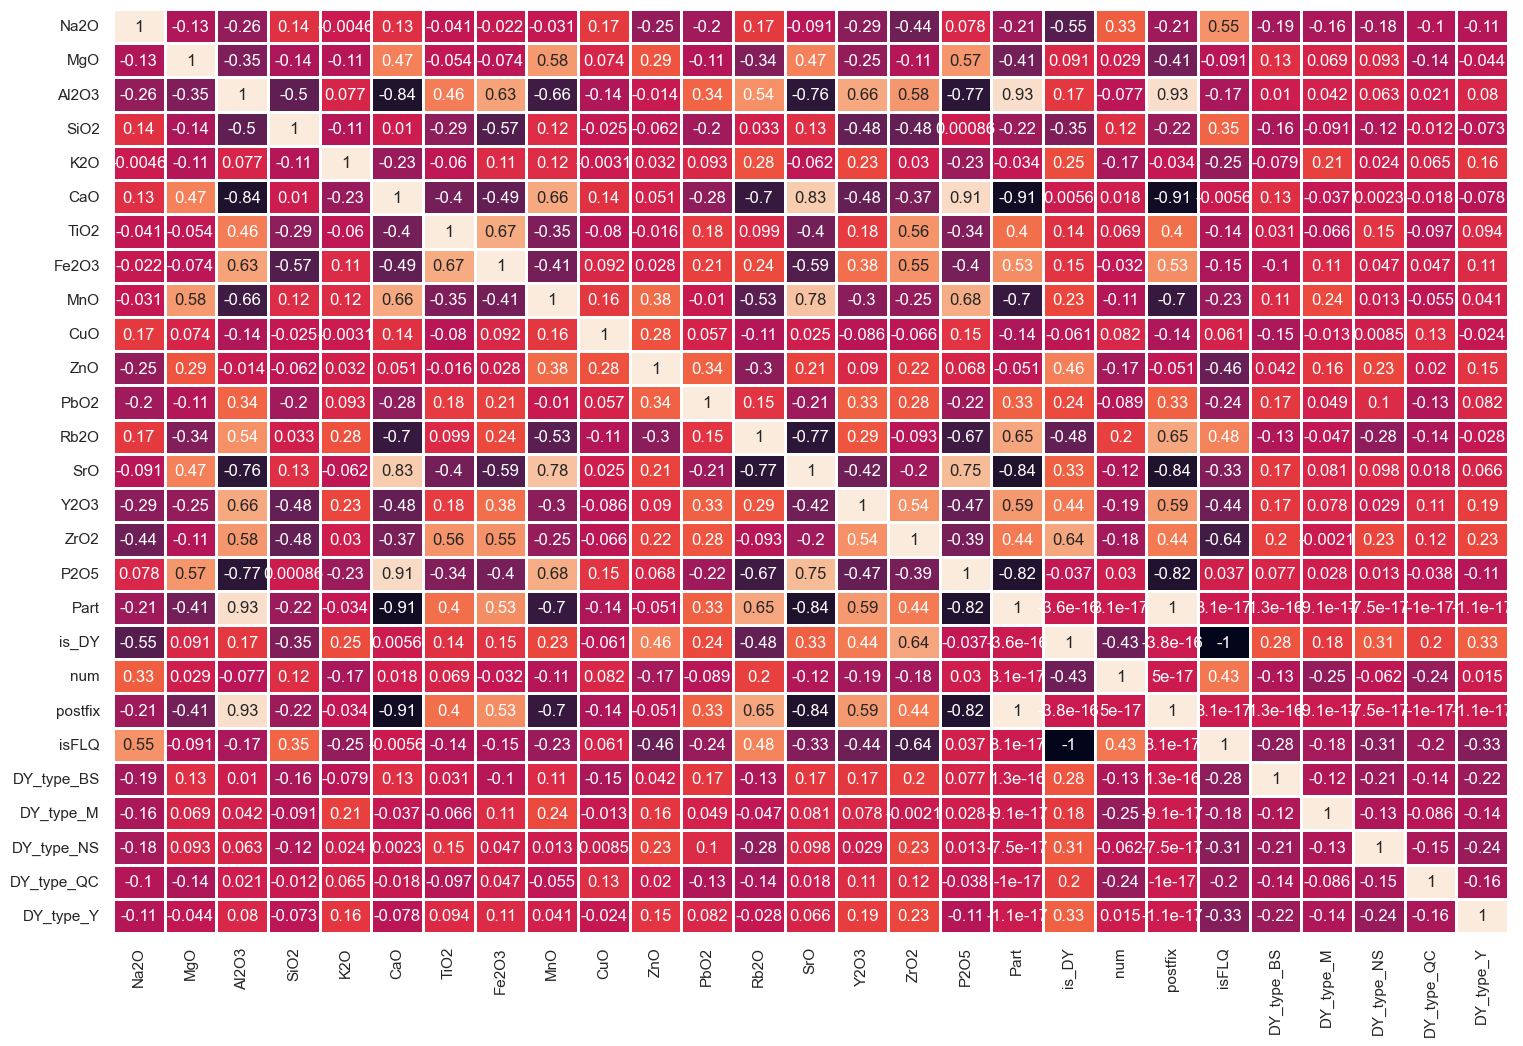

In [11]:
sns.set(rc = {'figure.figsize':(18,12)})
sns.heatmap(df1.corr(), annot=True, linewidths=2, cbar=False)

In [ ]:
Имеем тепловую матрицу, чтобы понимать, какие элементы хорошо взаимодействуют между собой

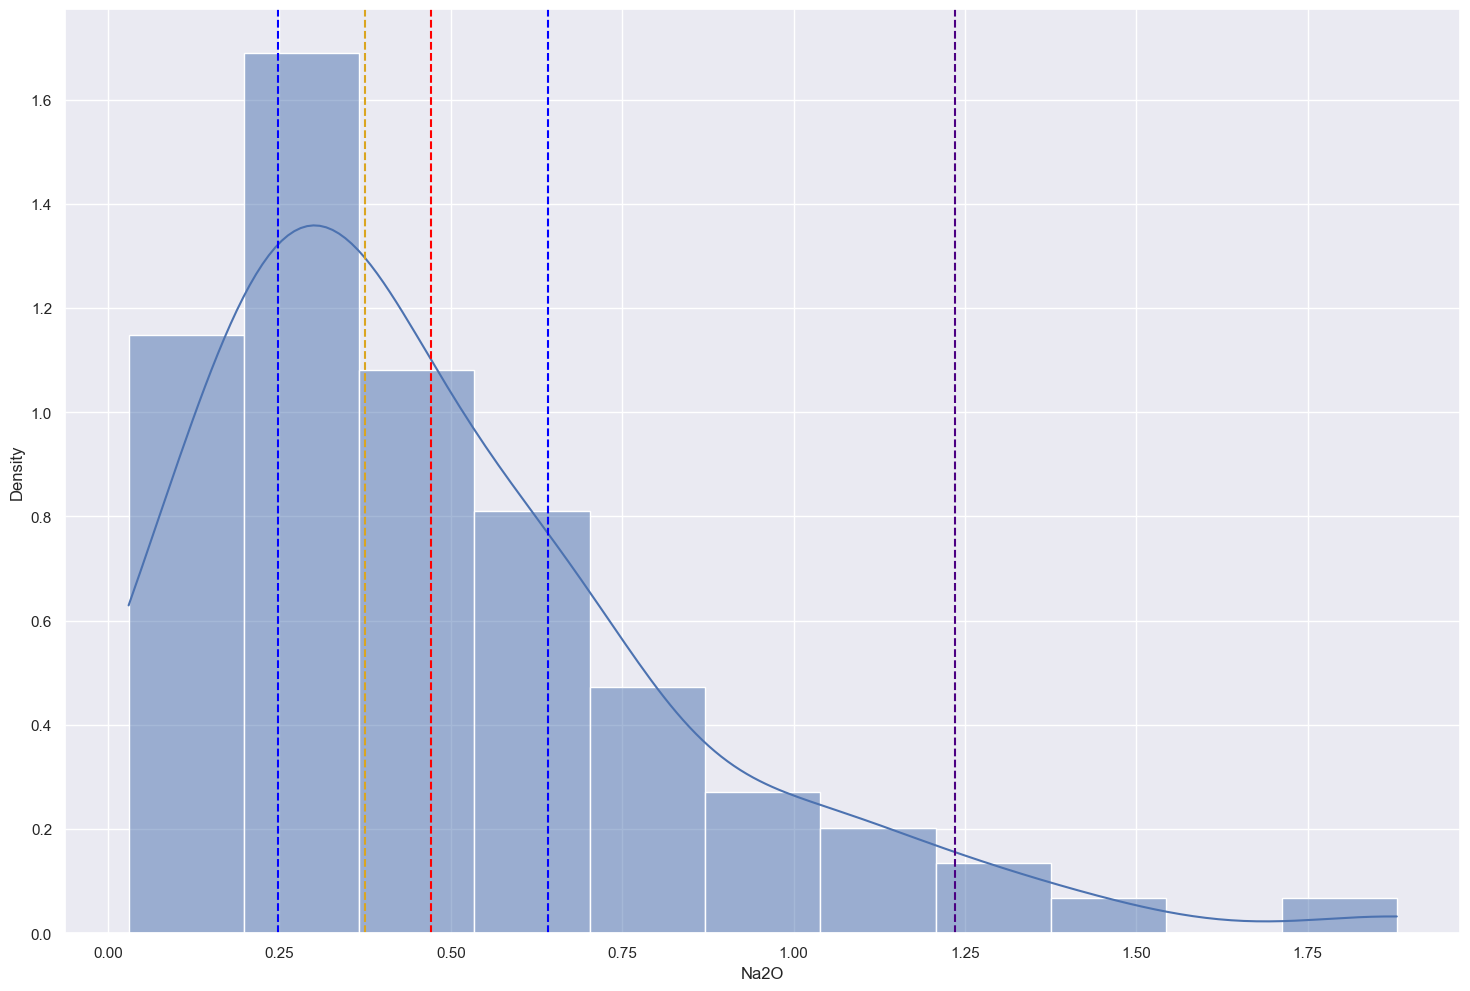

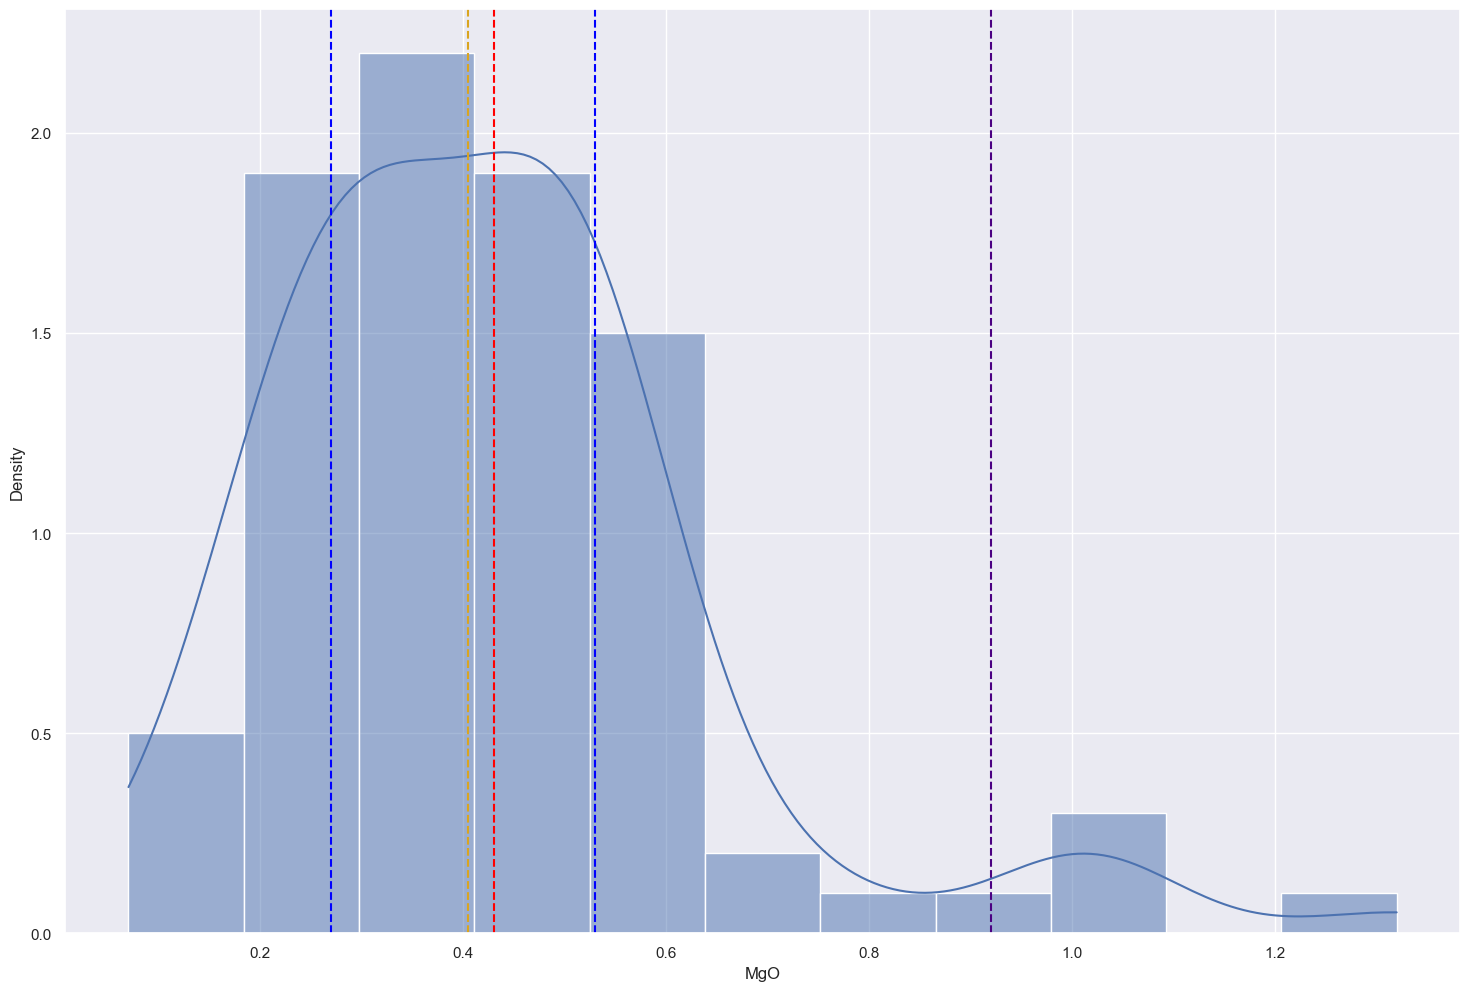

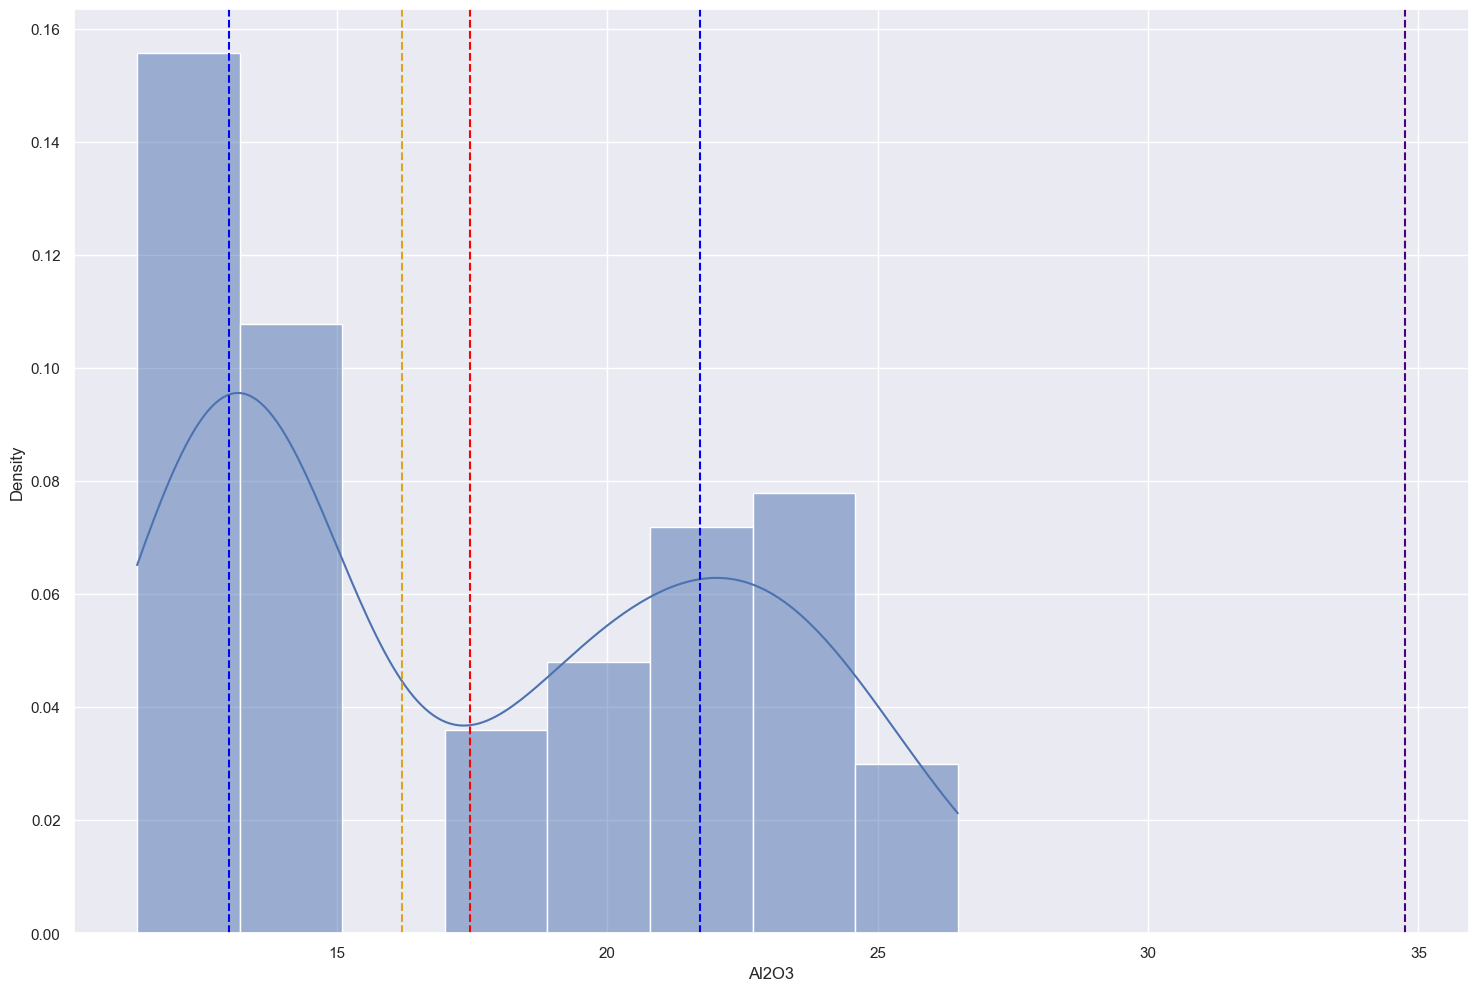

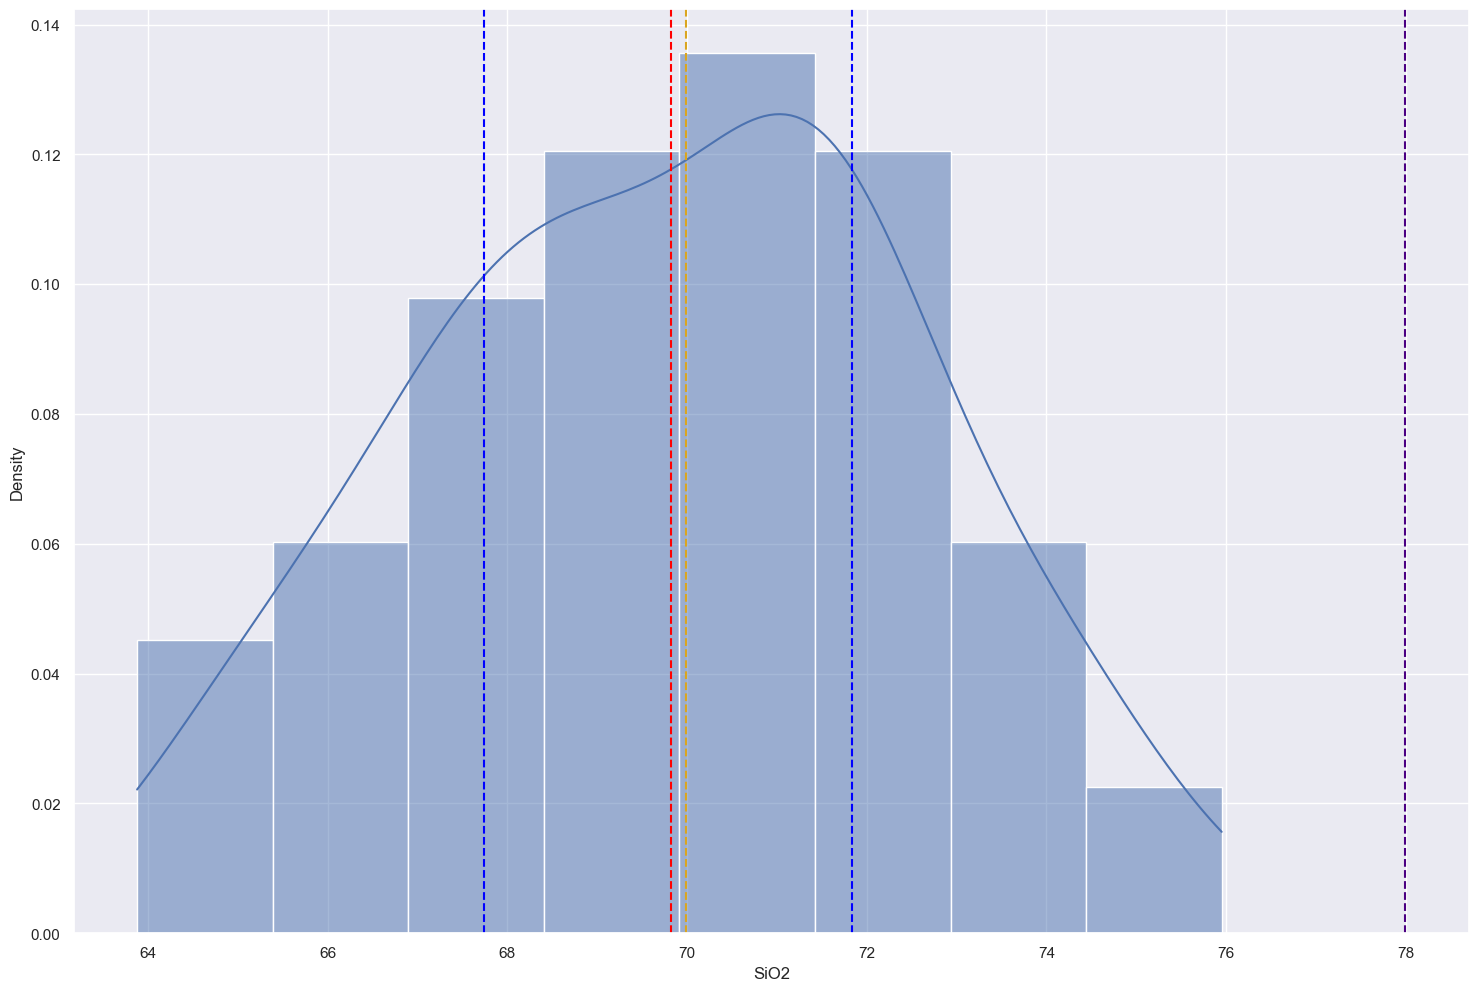

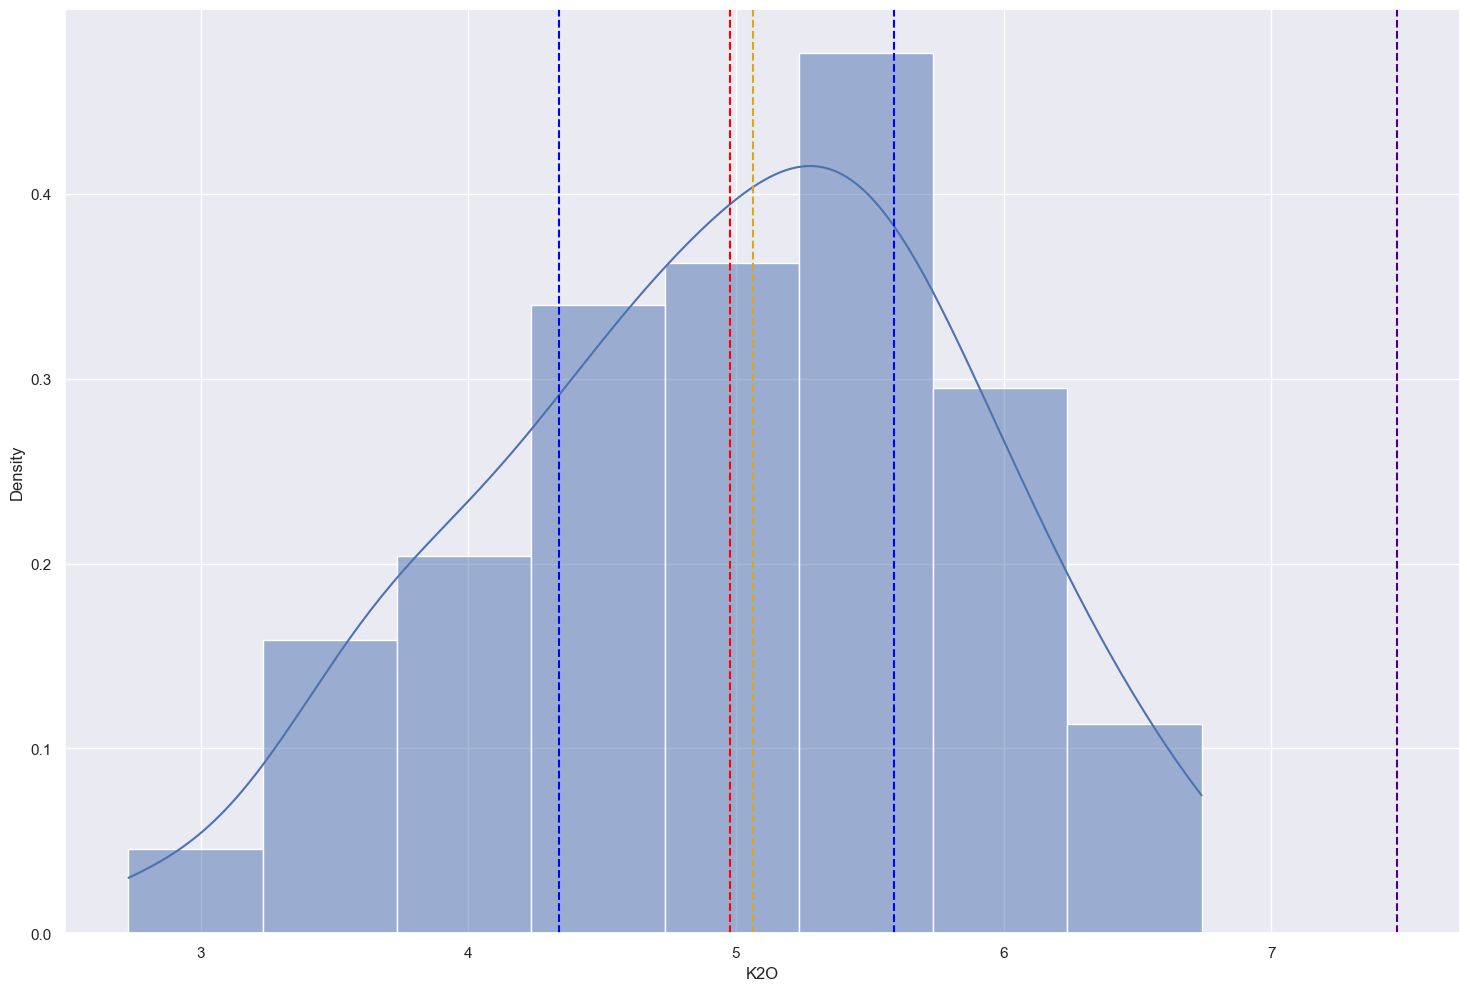

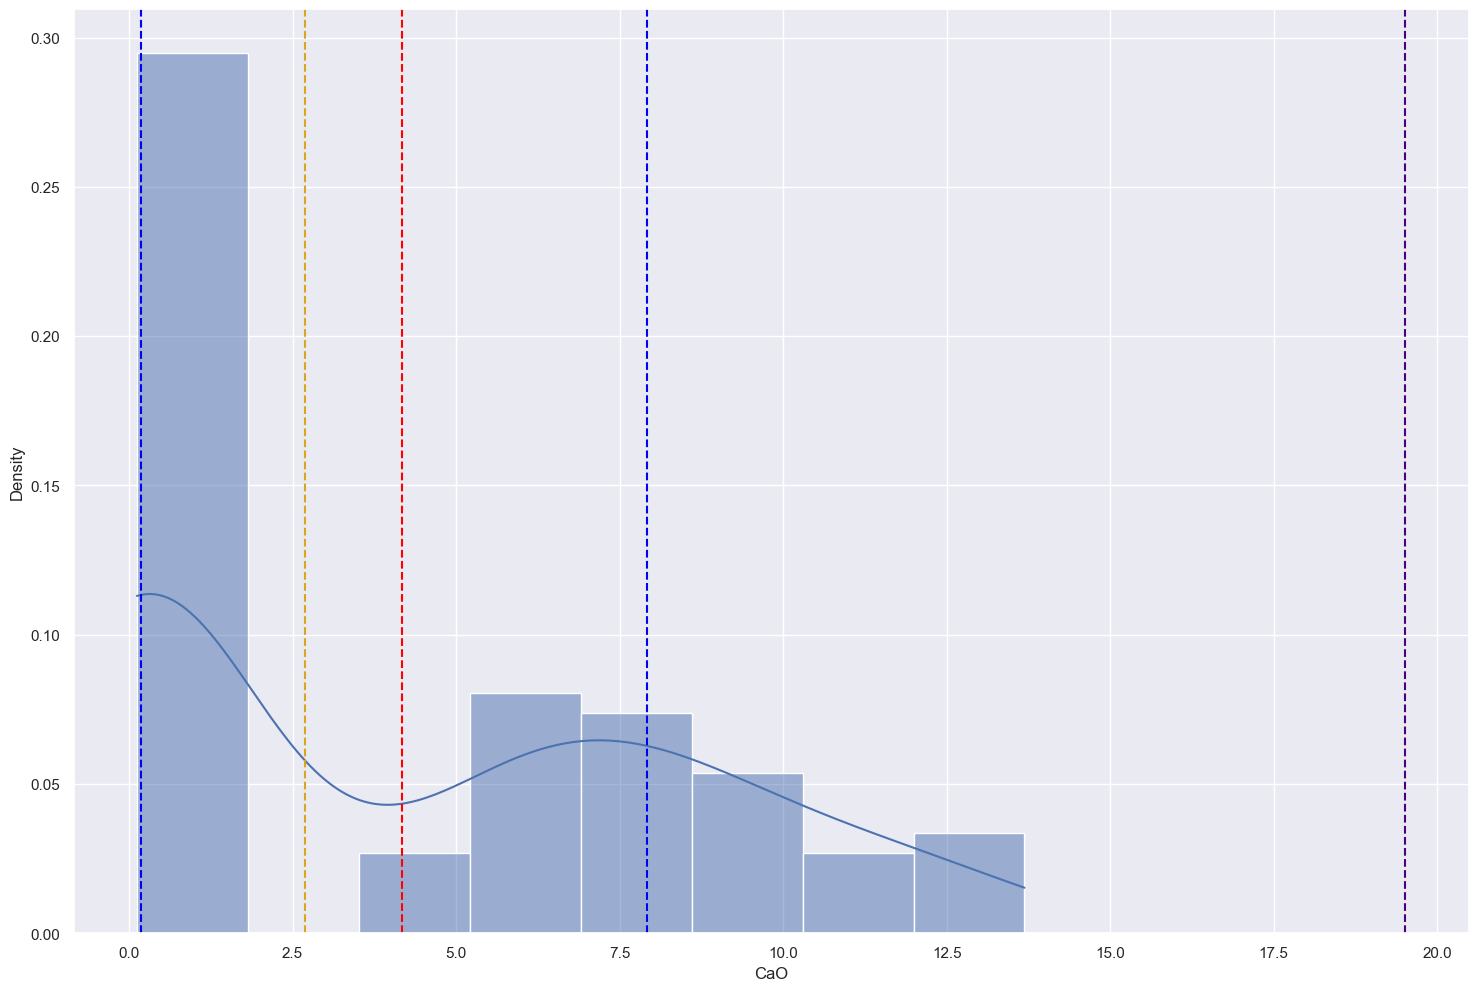

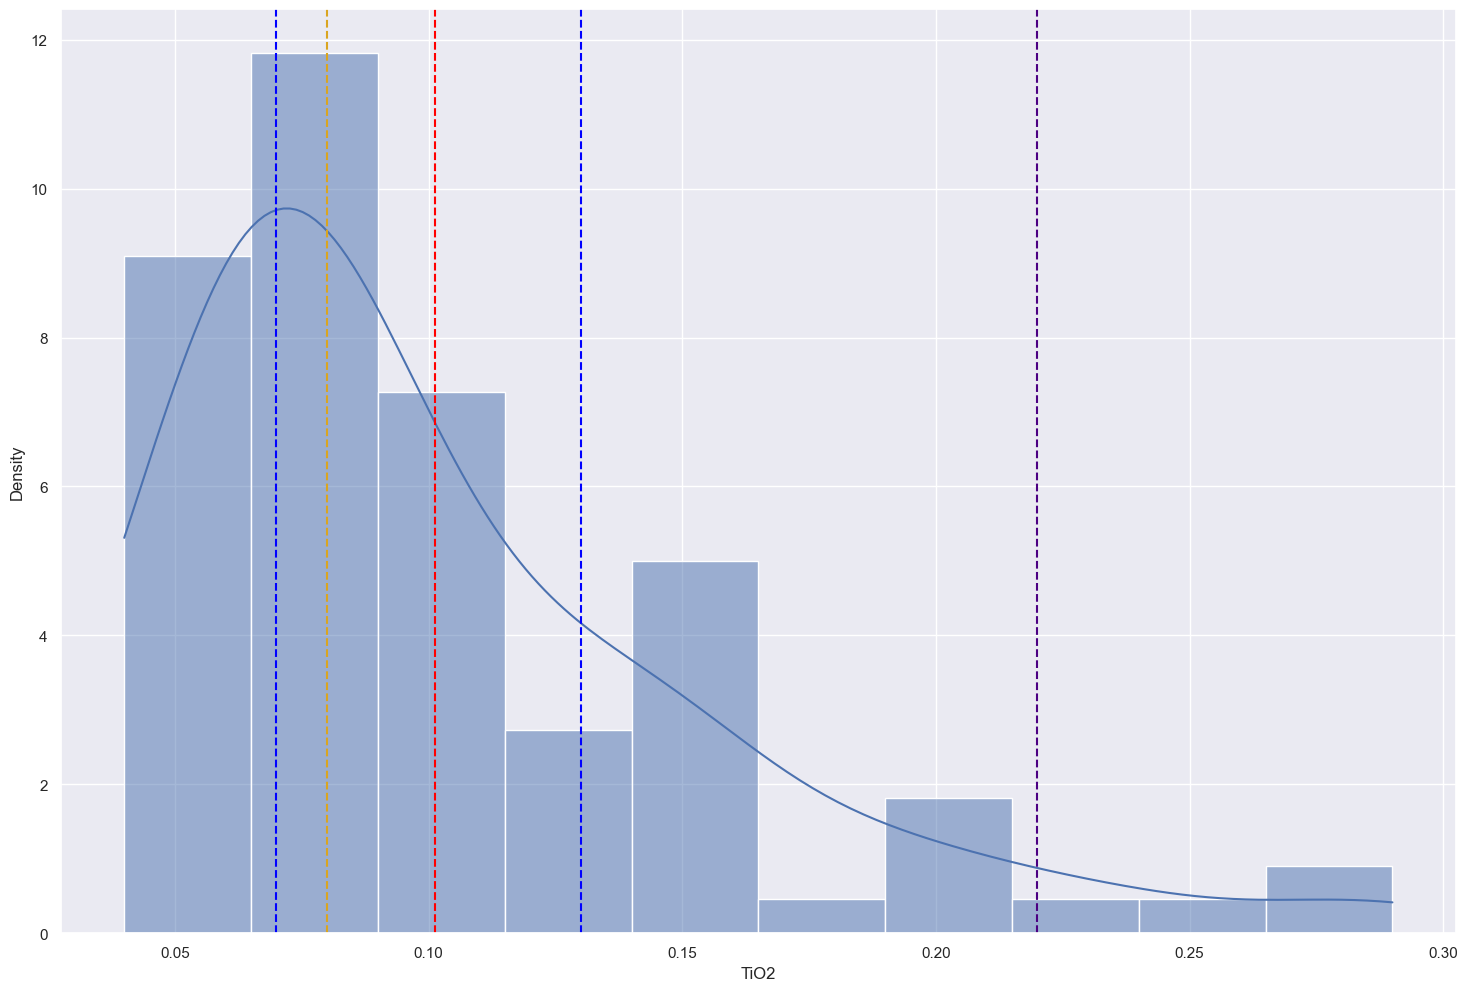

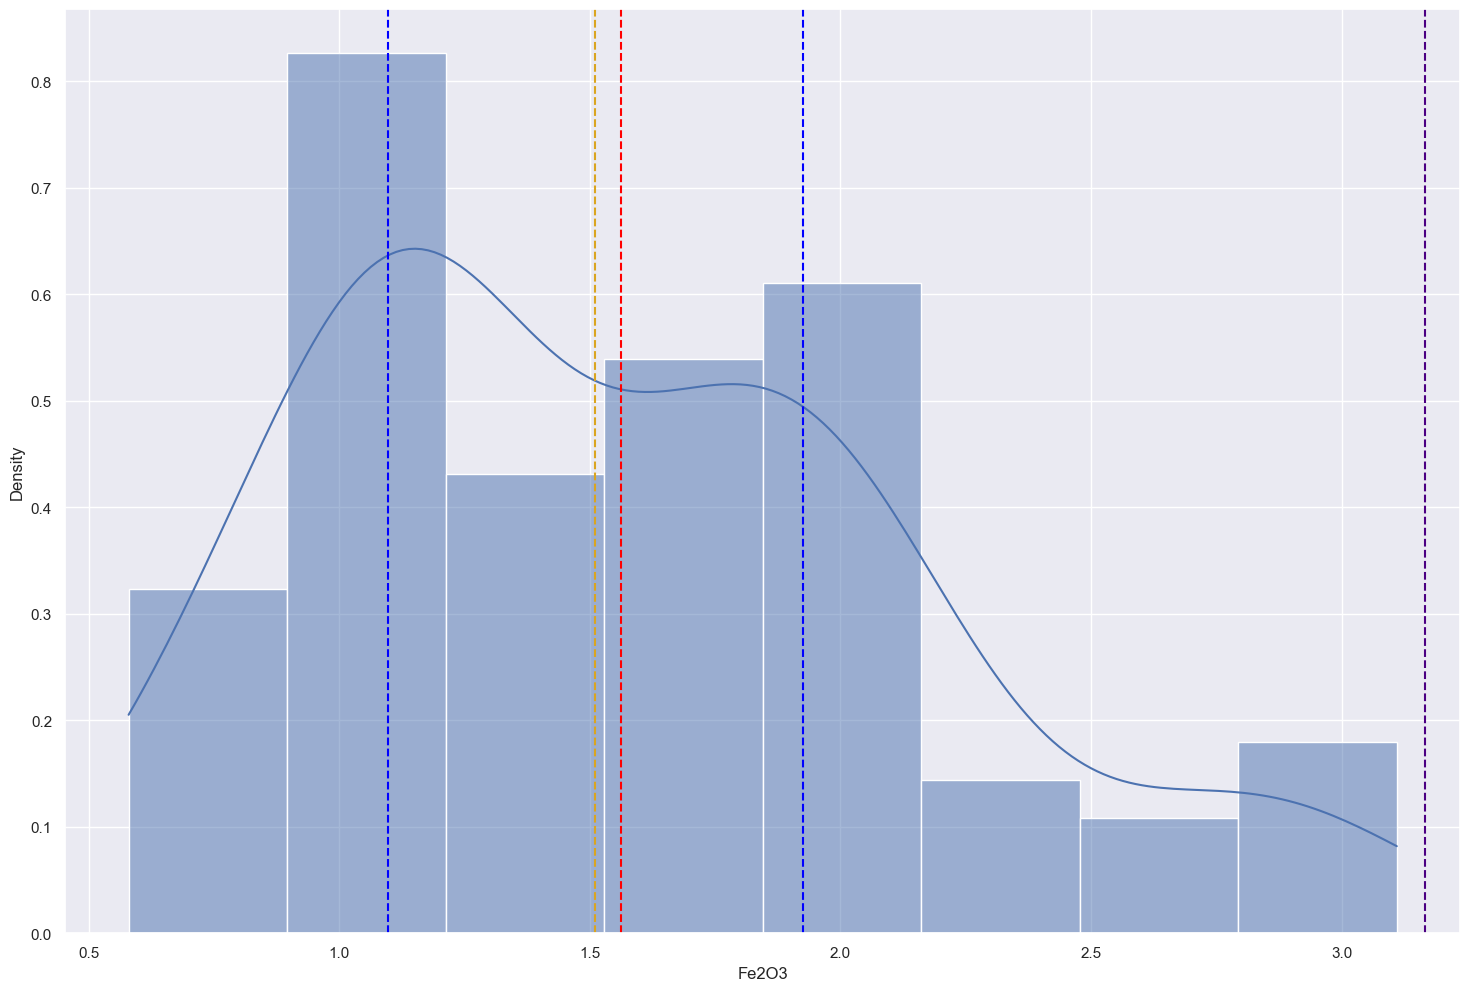

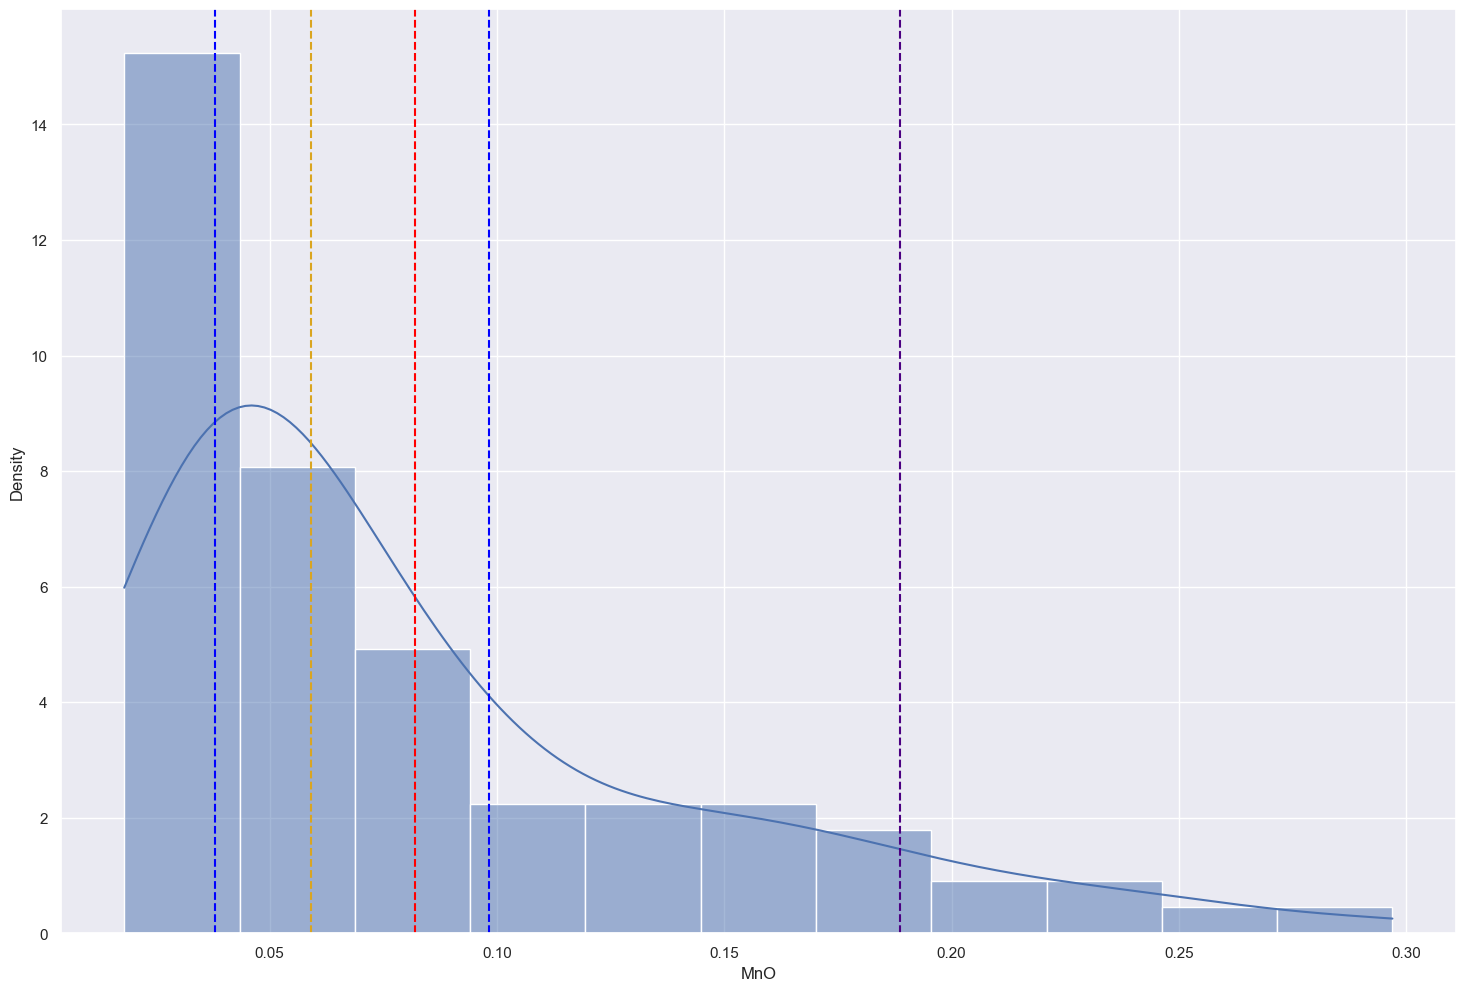

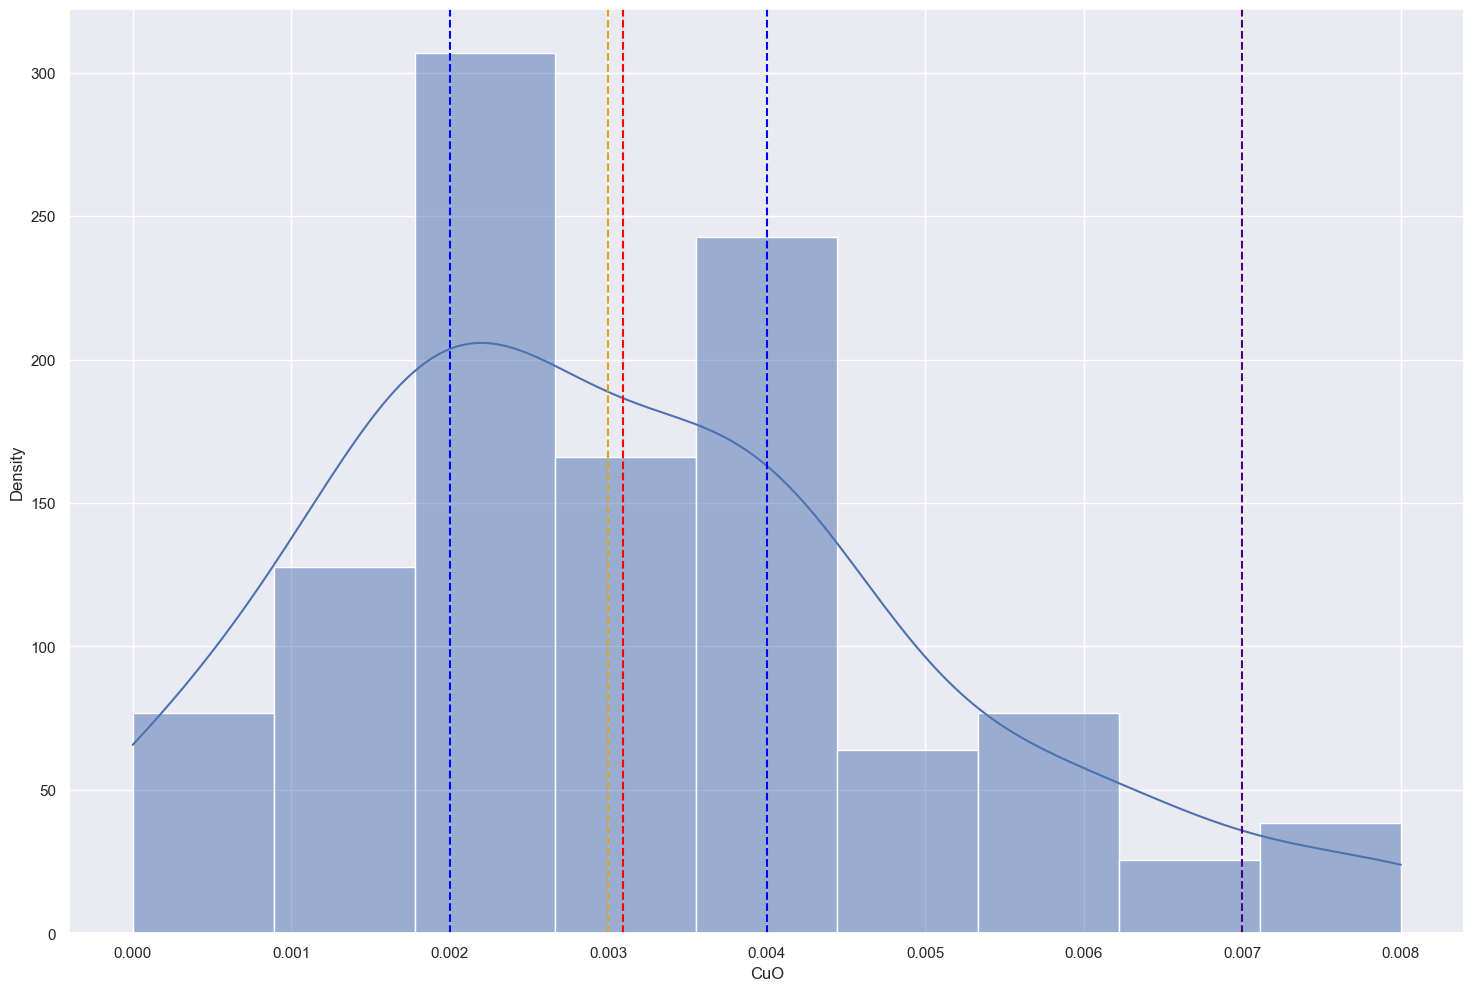

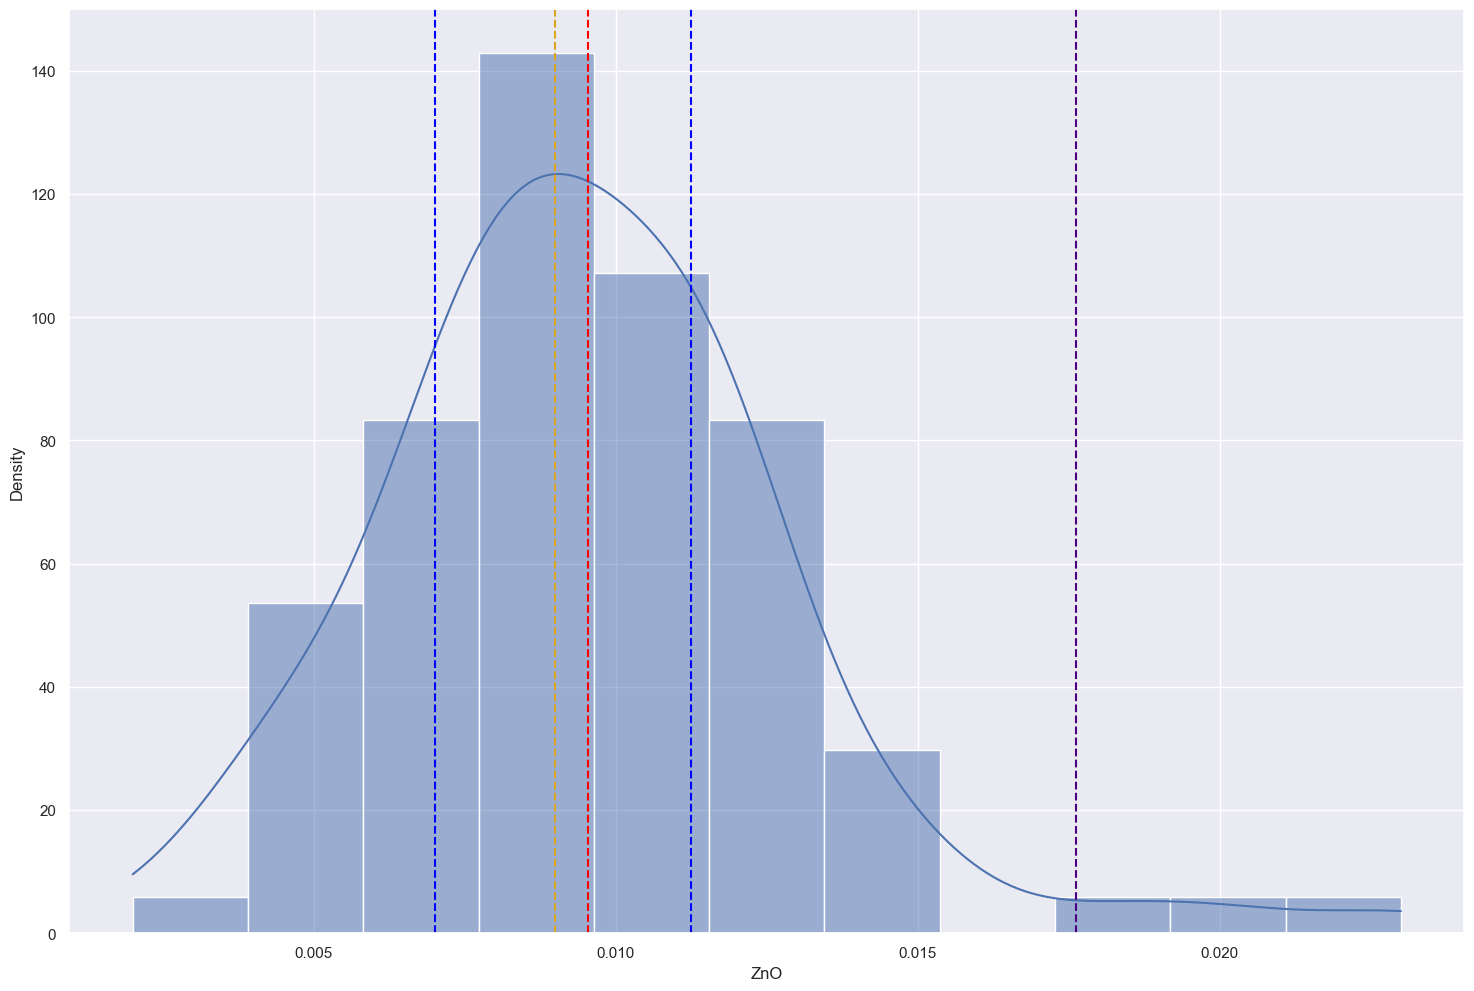

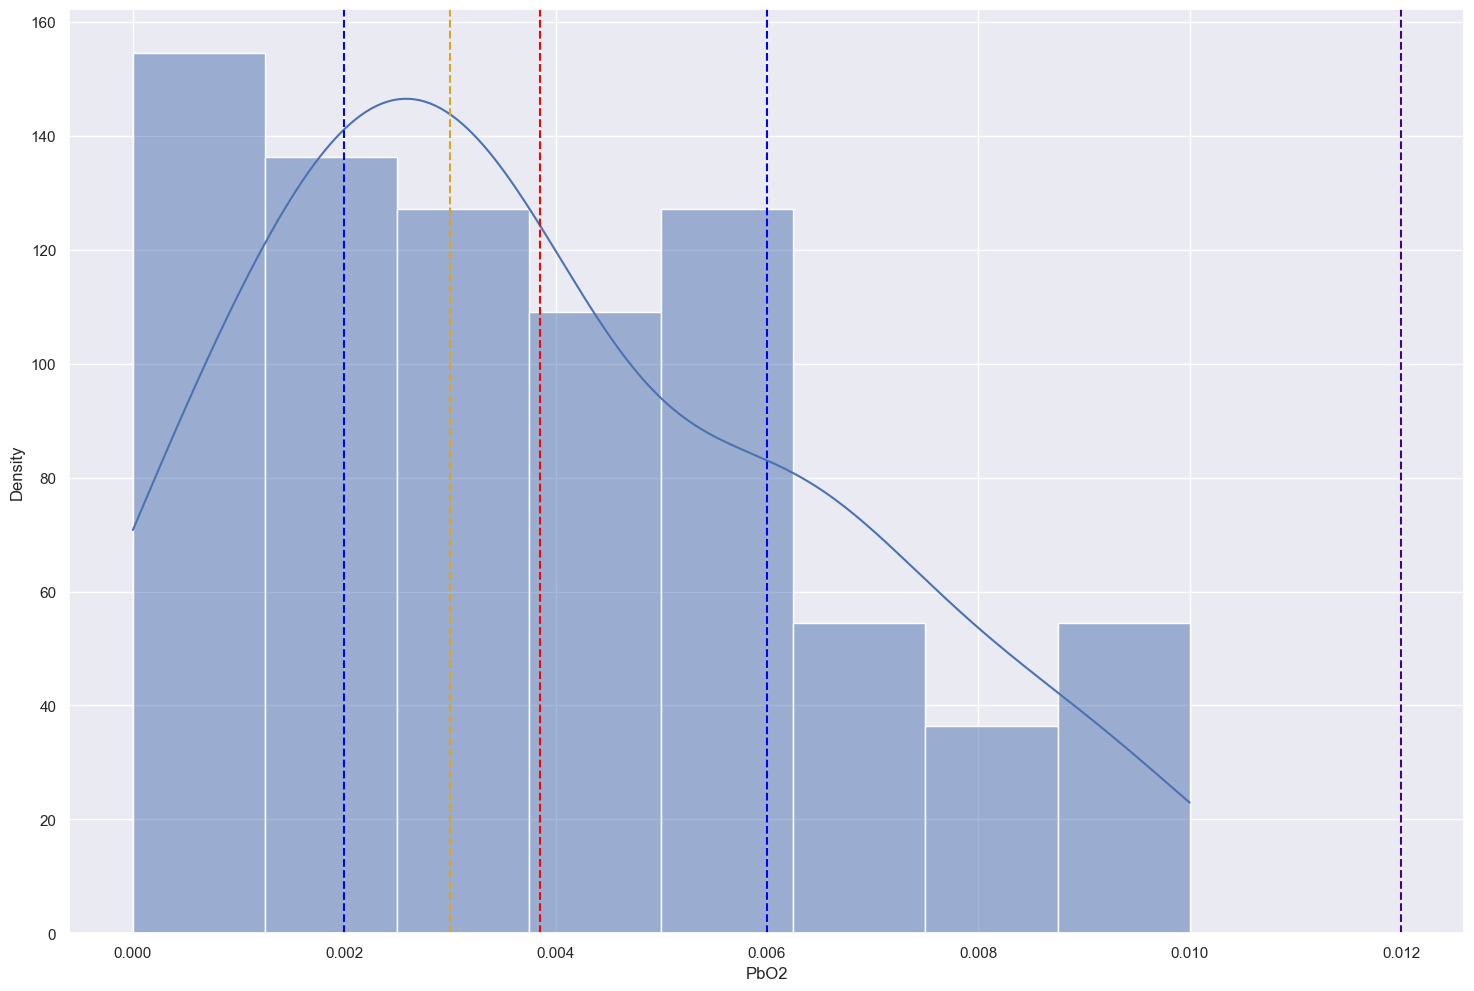

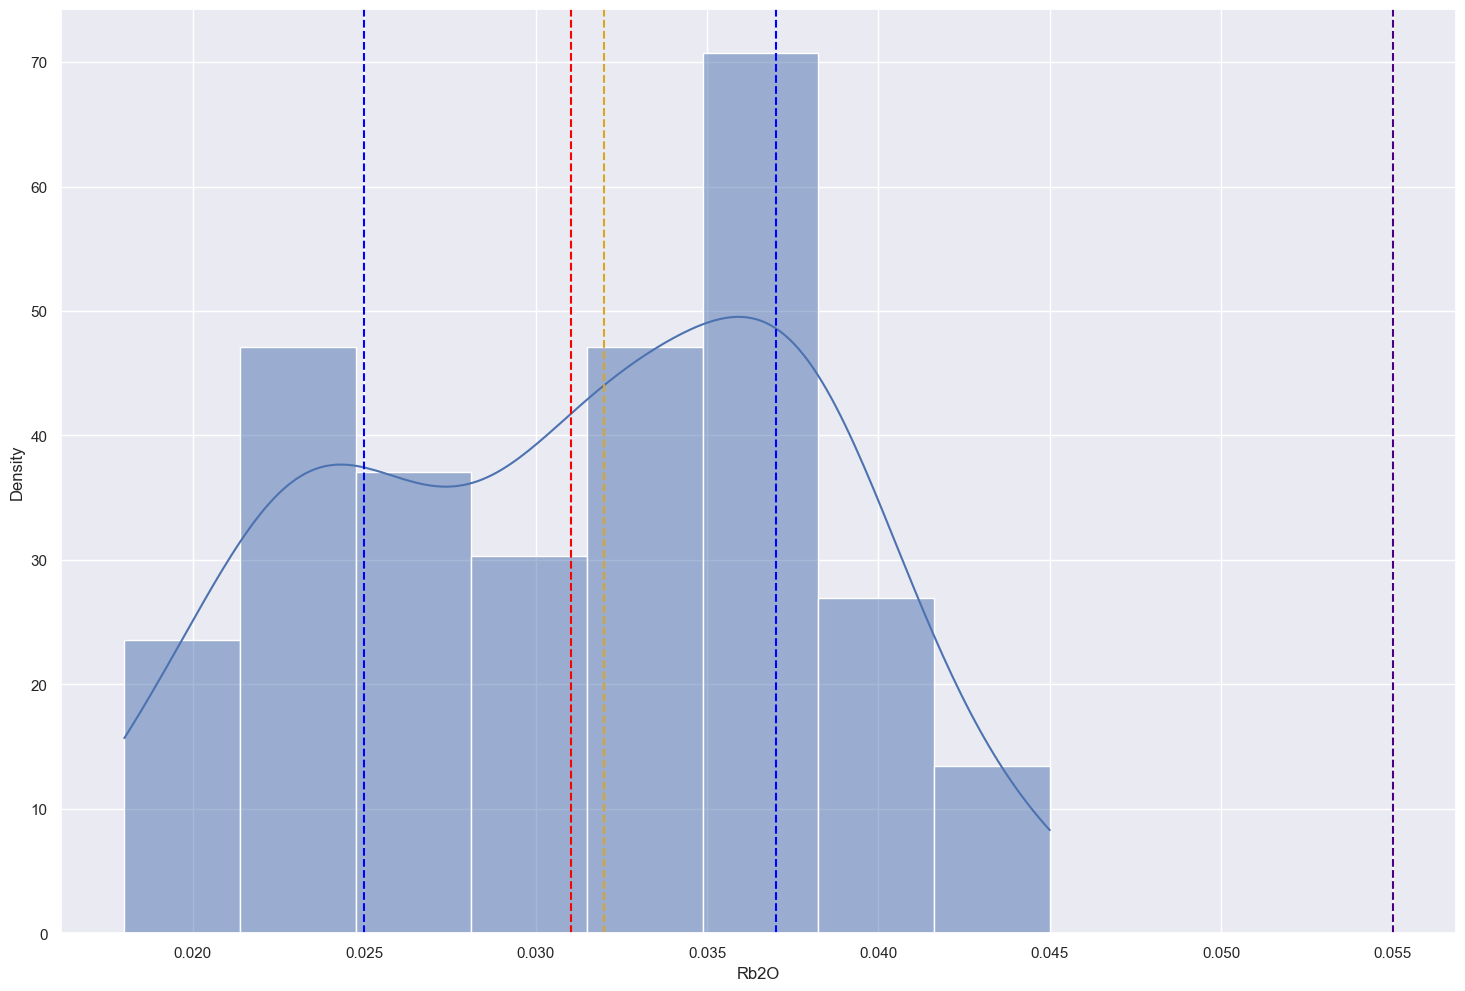

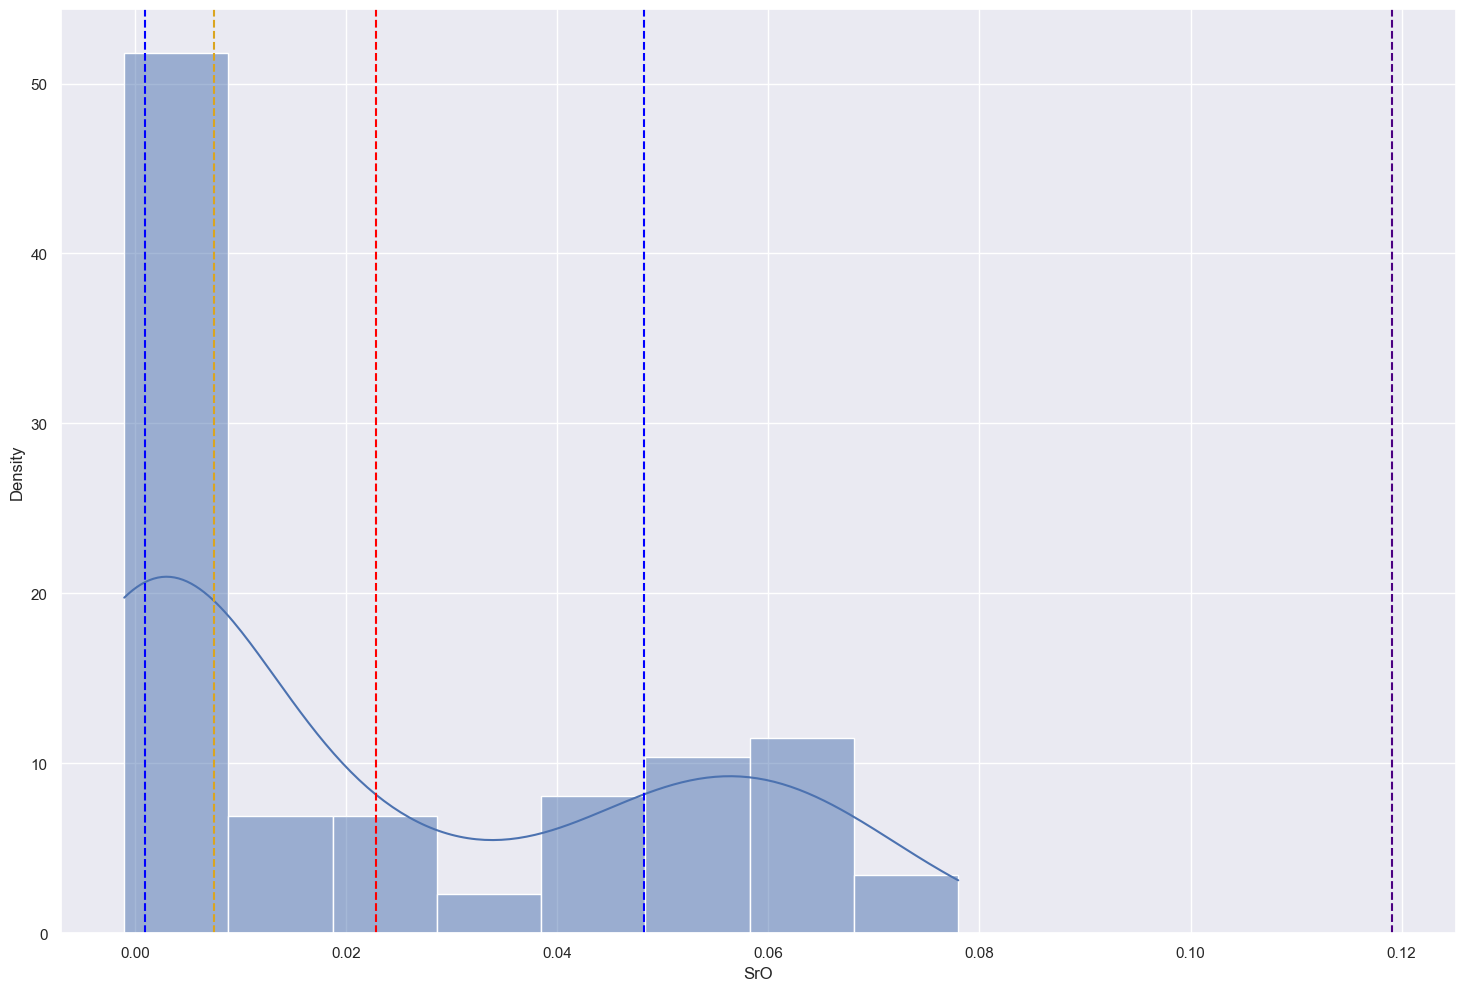

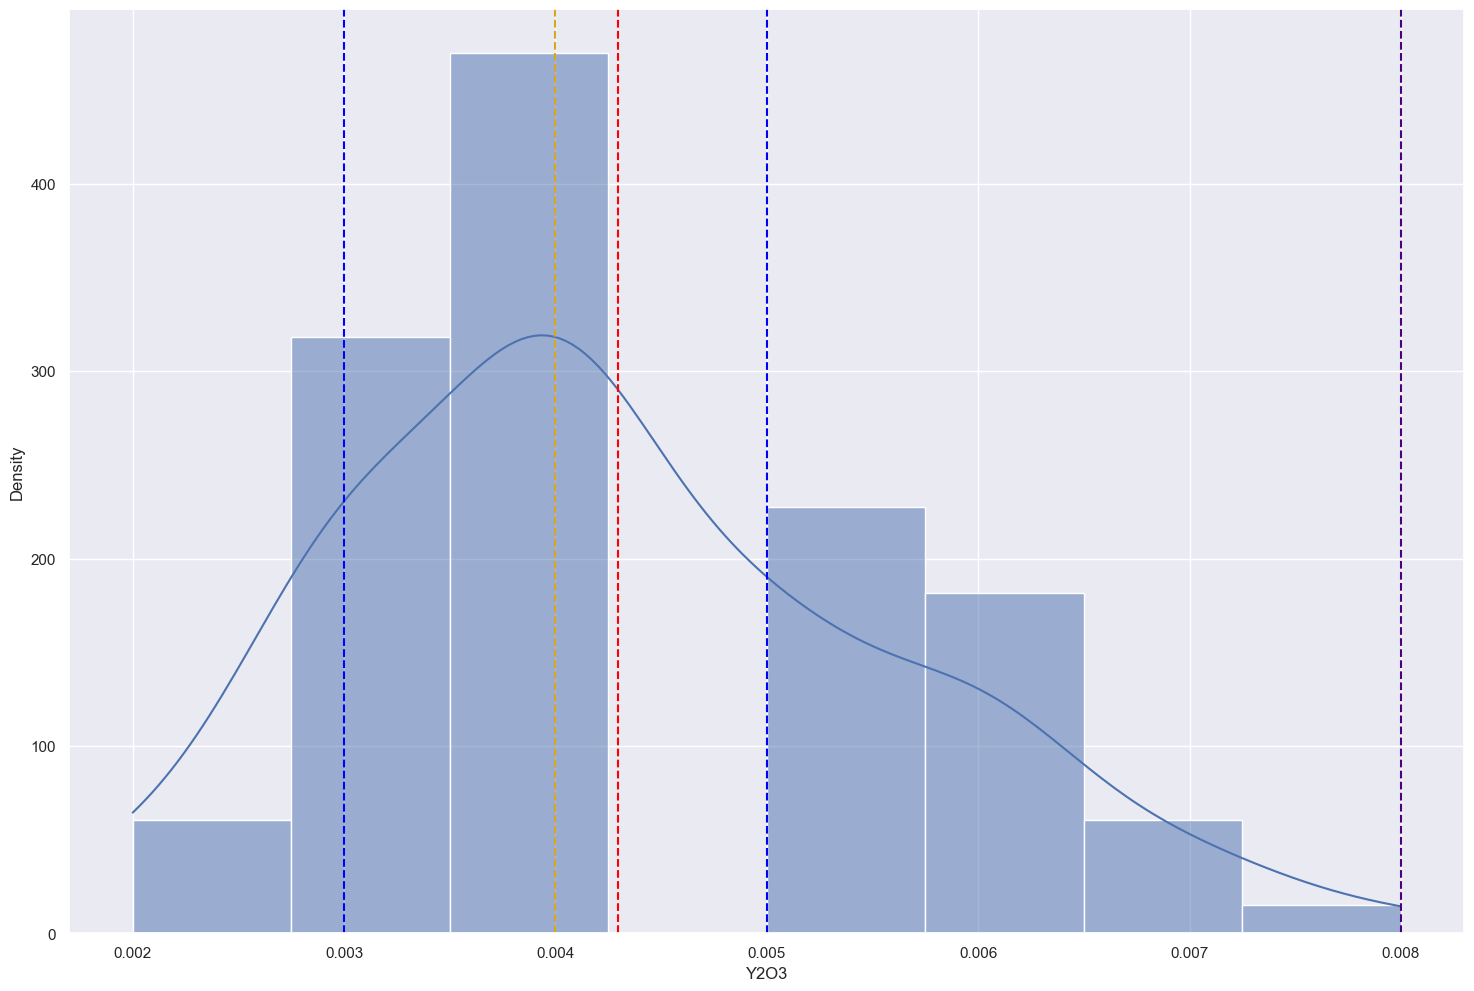

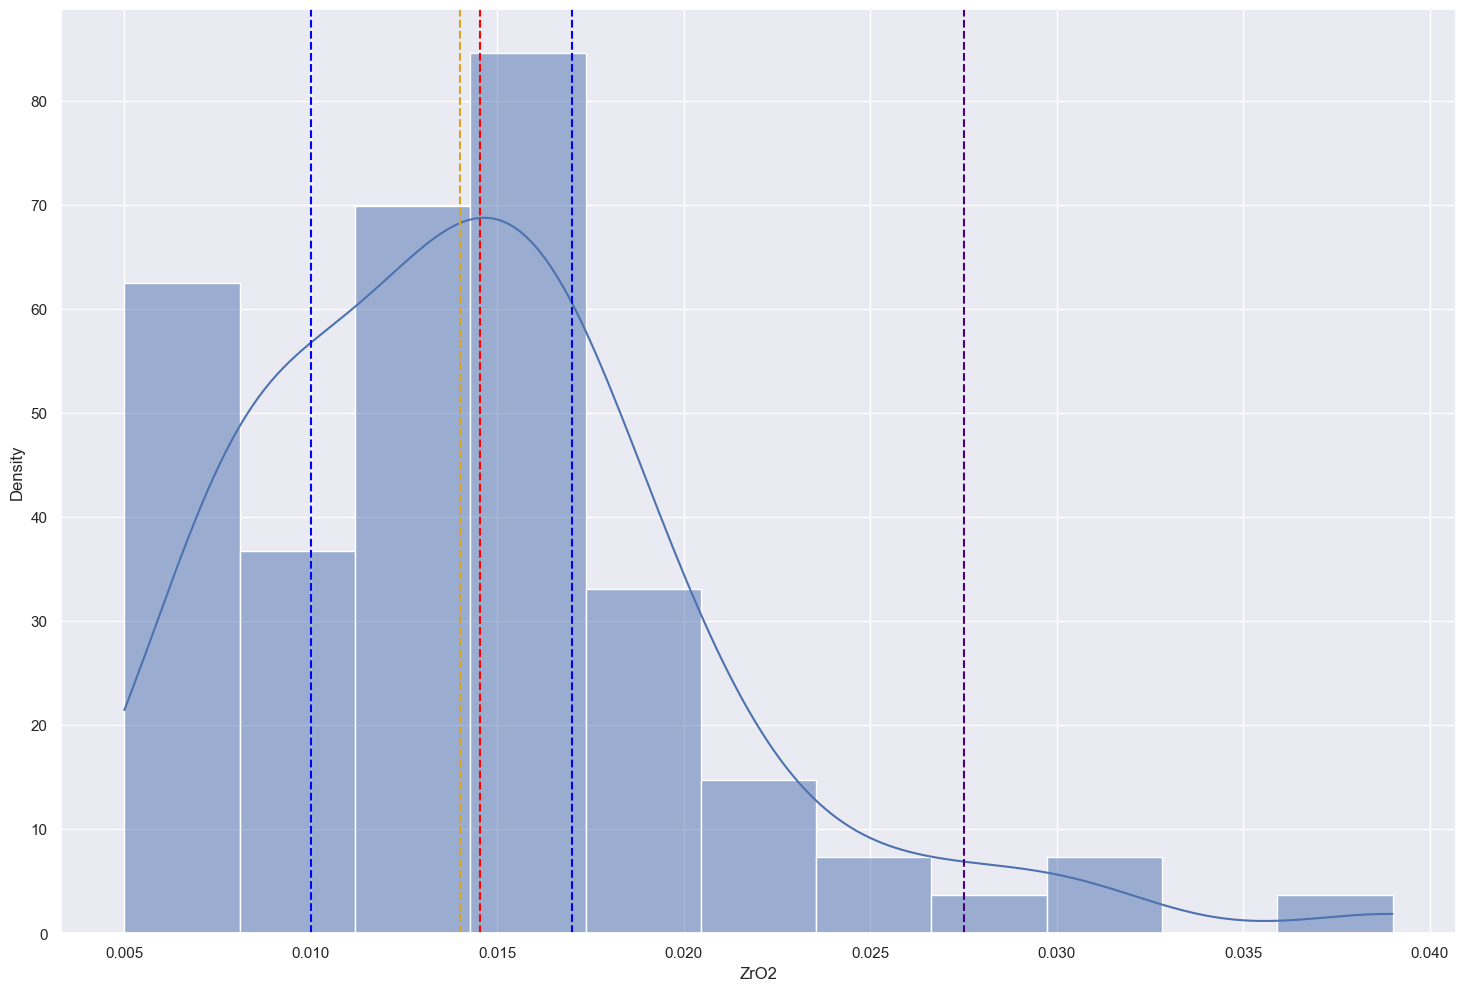

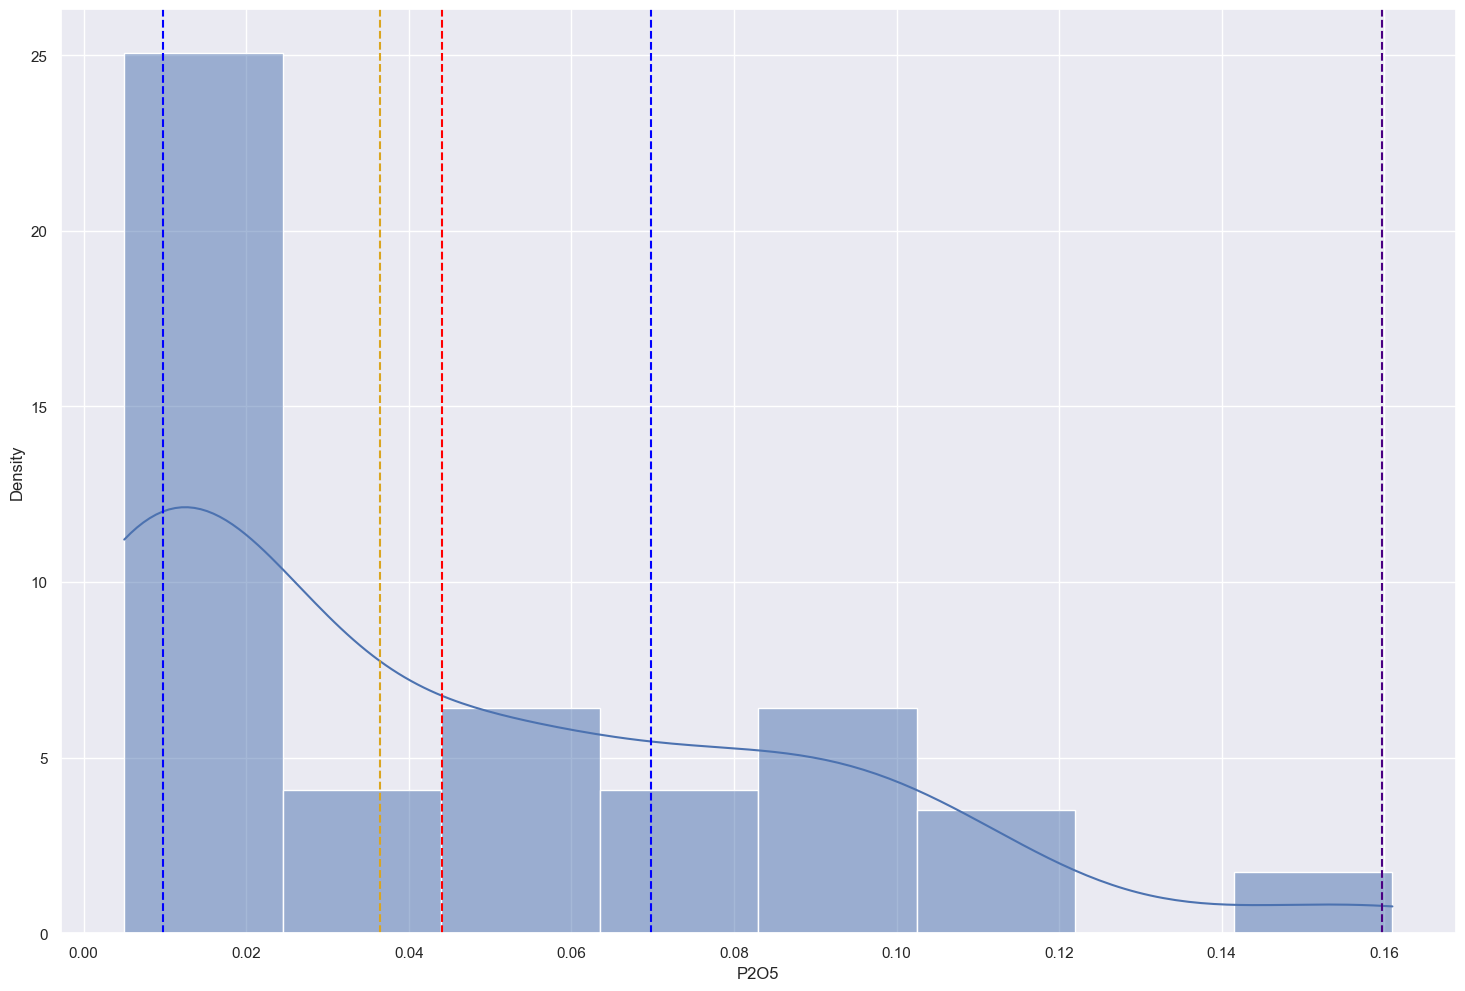

In [12]:
for i in ['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'Fe2O3', 'MnO',
       'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5']:
    plt.figure(i)
    sns.histplot(df1[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i], color="blue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="blue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

Part


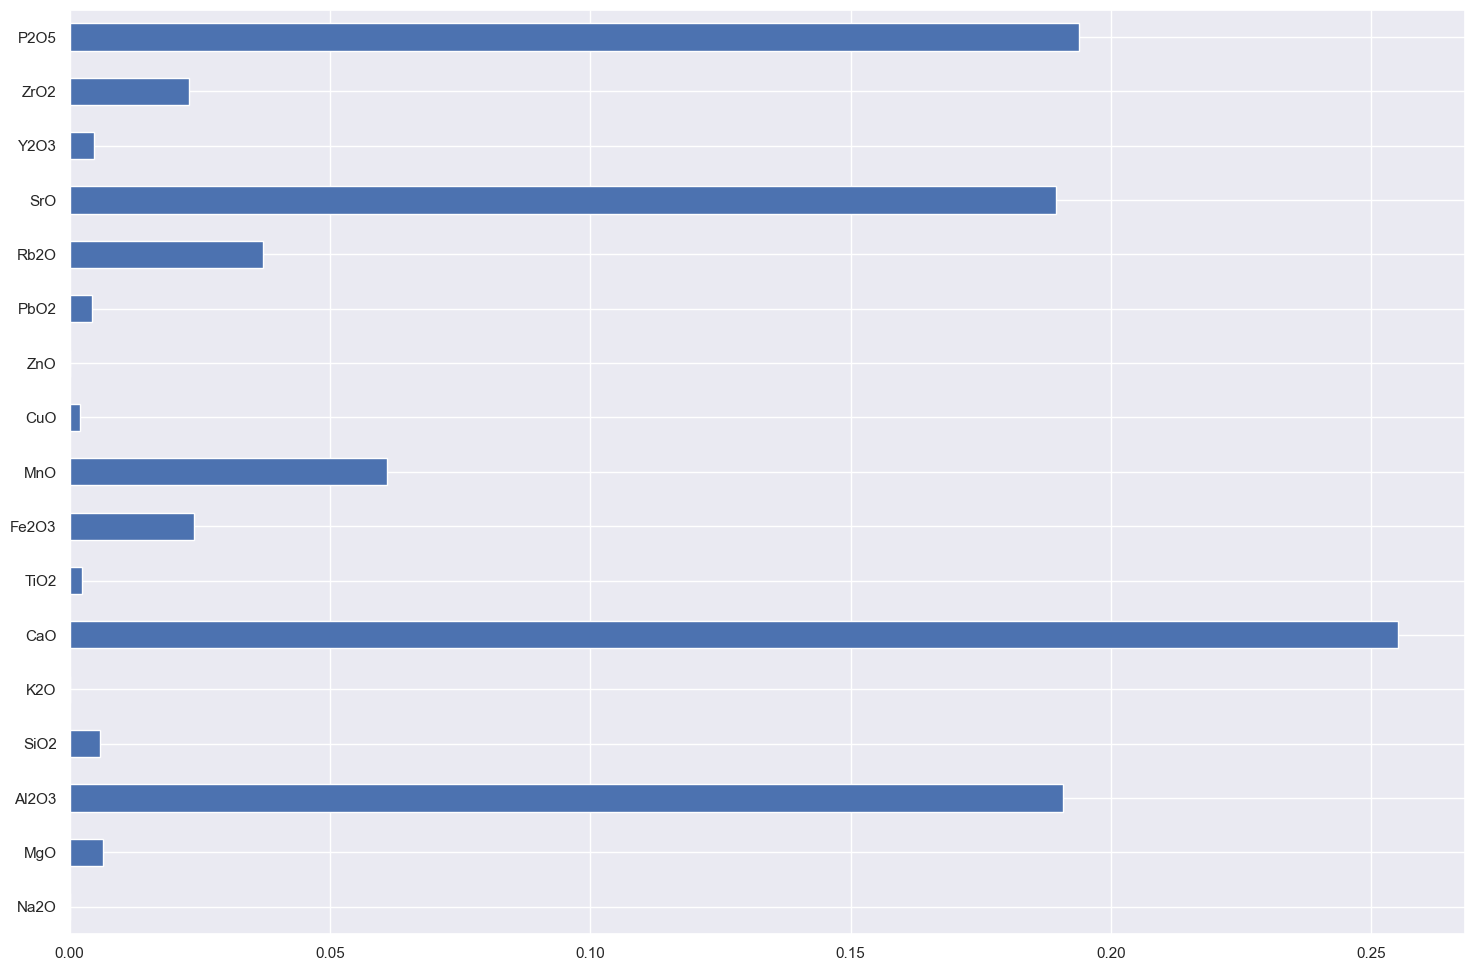

is_DY


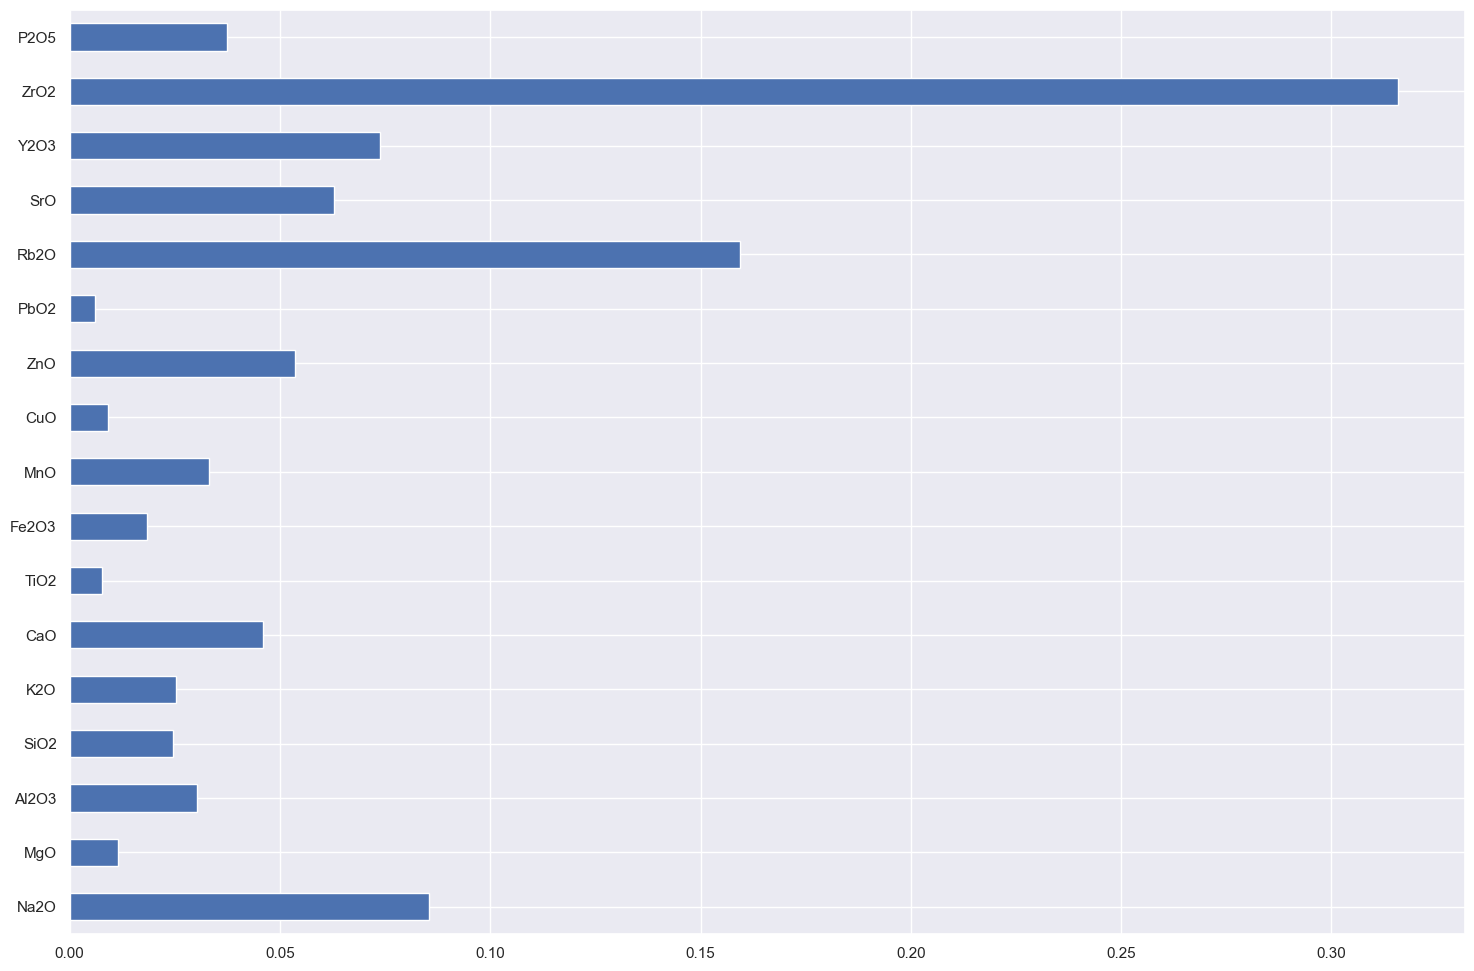

isFLQ


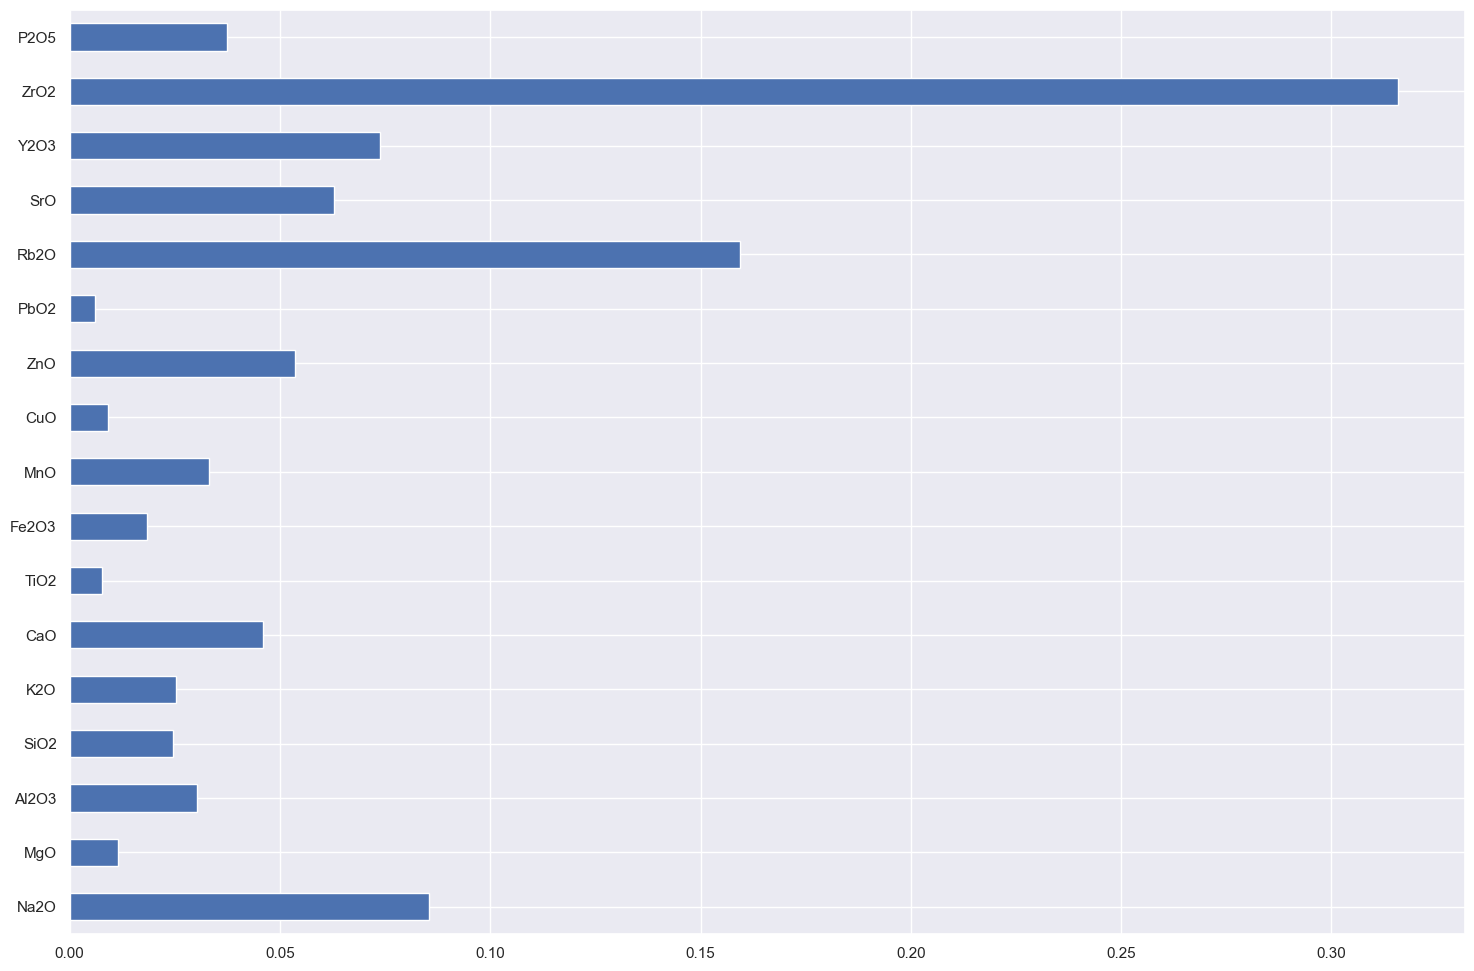

num


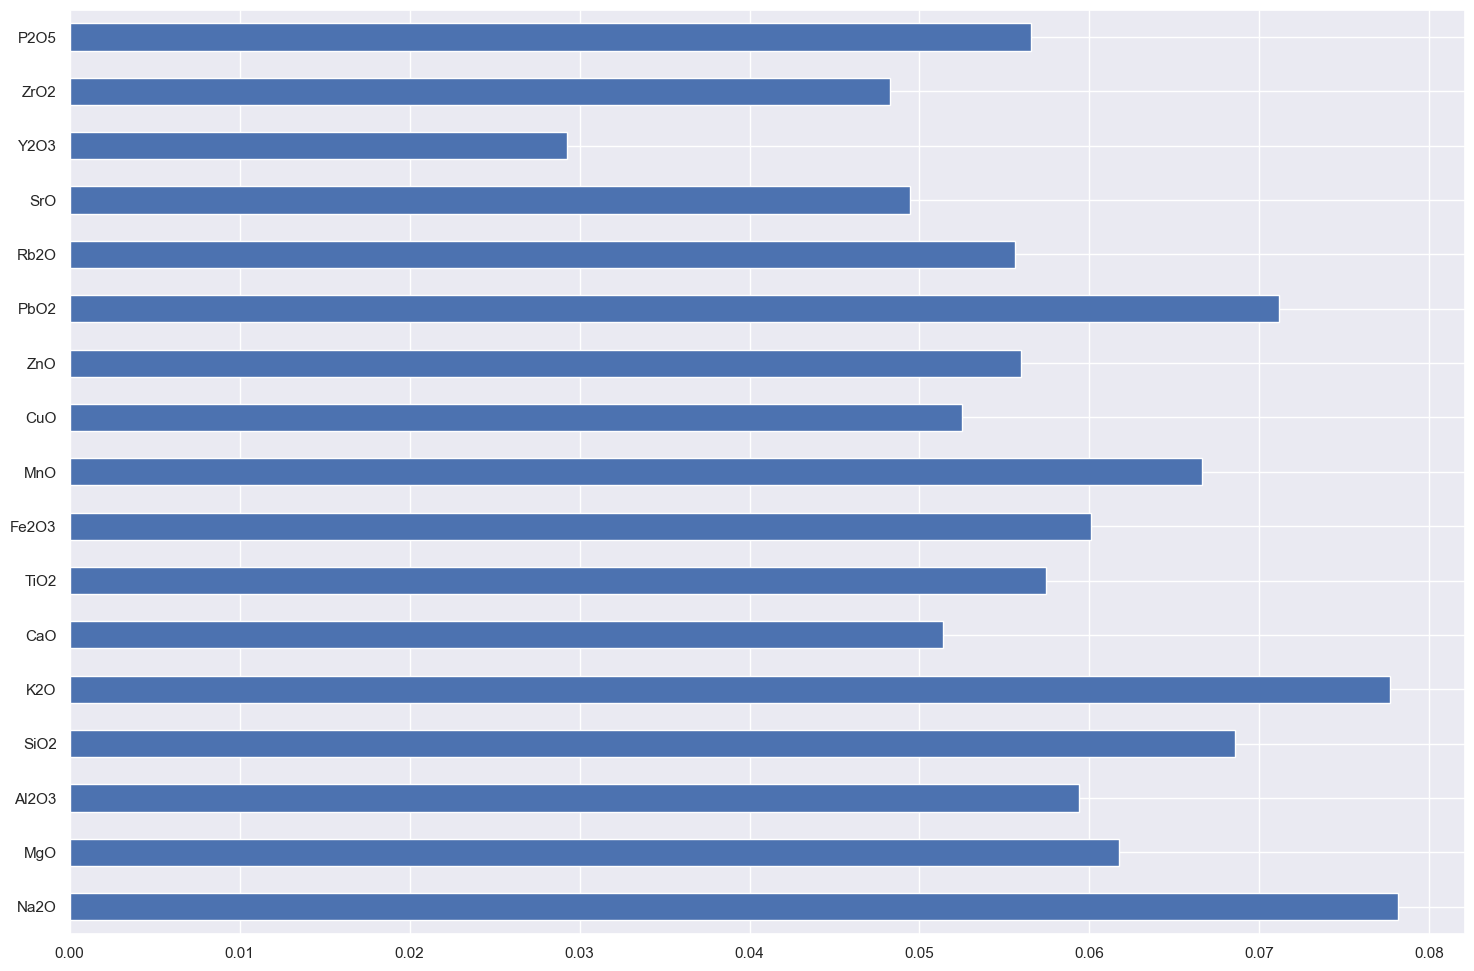

postfix


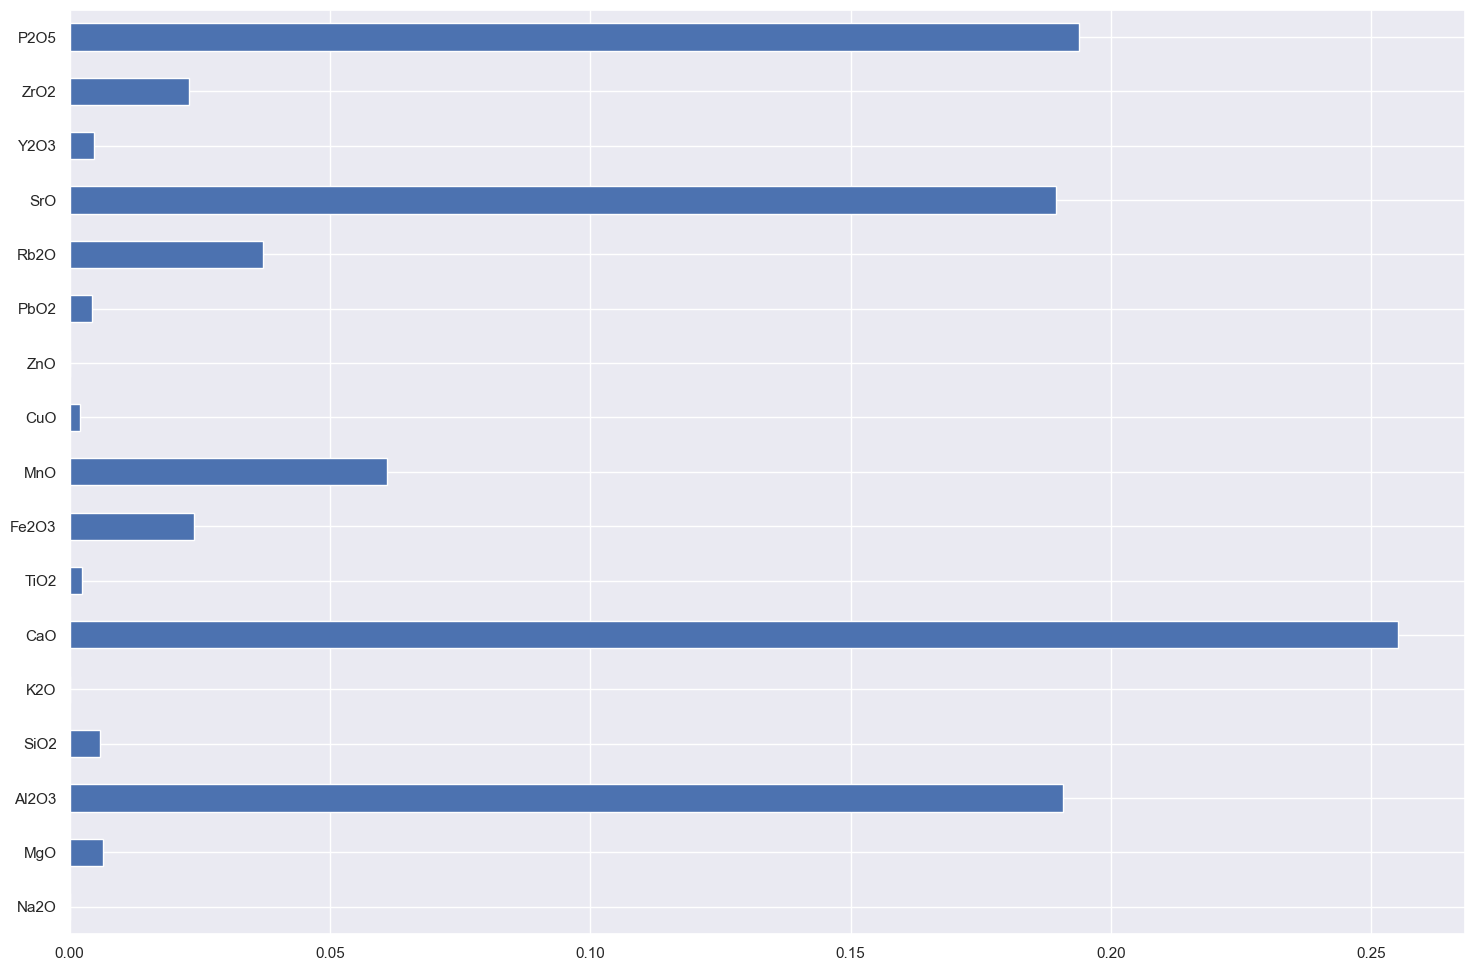

DY_type_BS


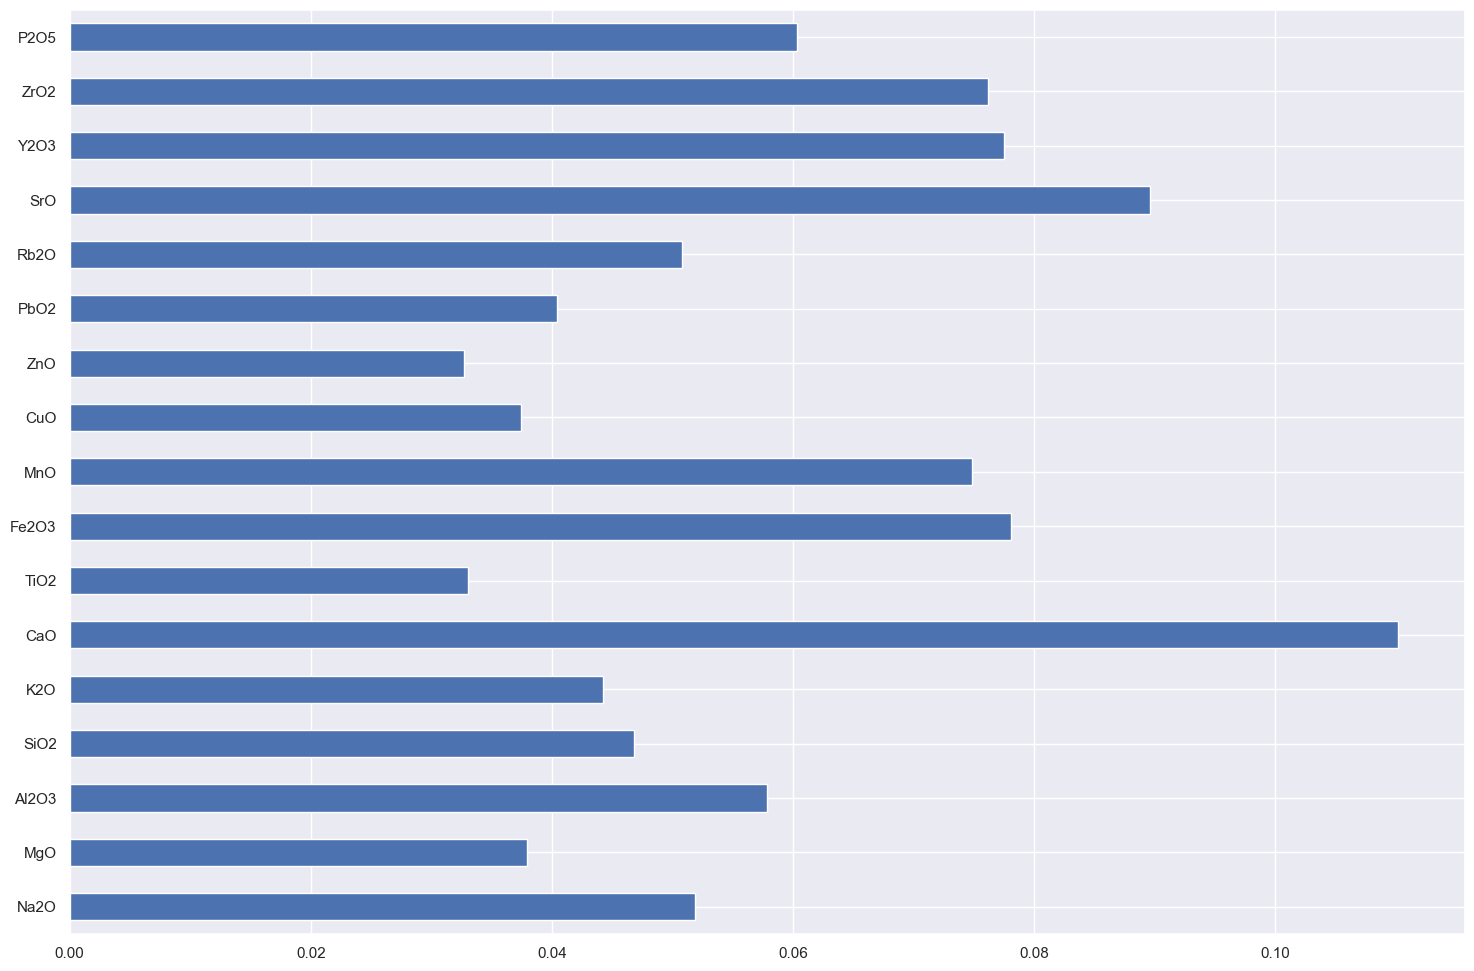

DY_type_M


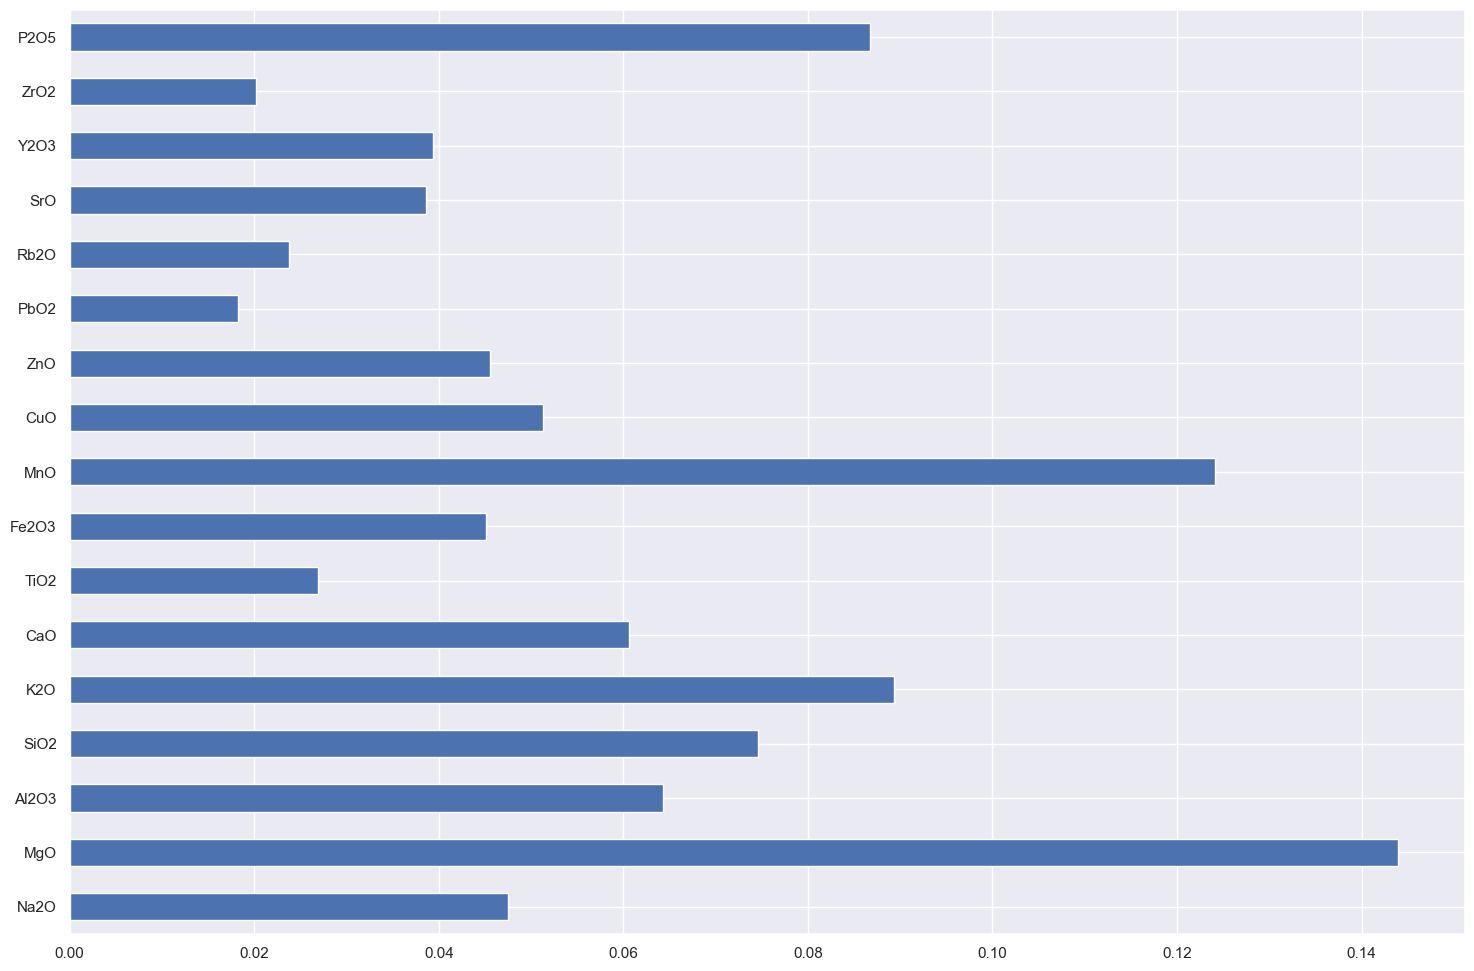

DY_type_NS


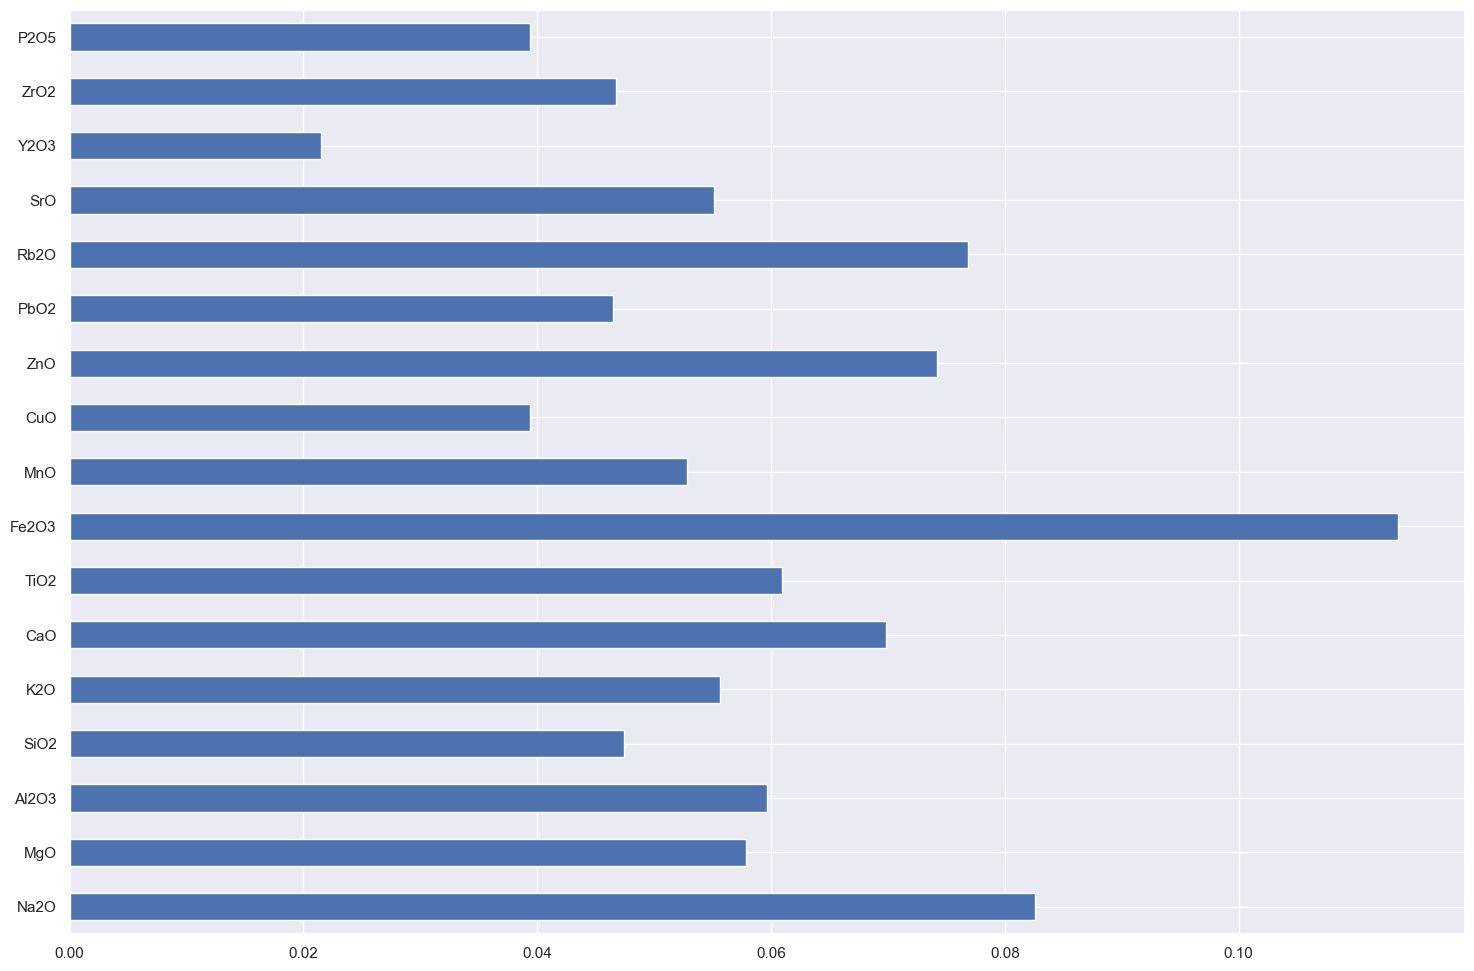

DY_type_QC


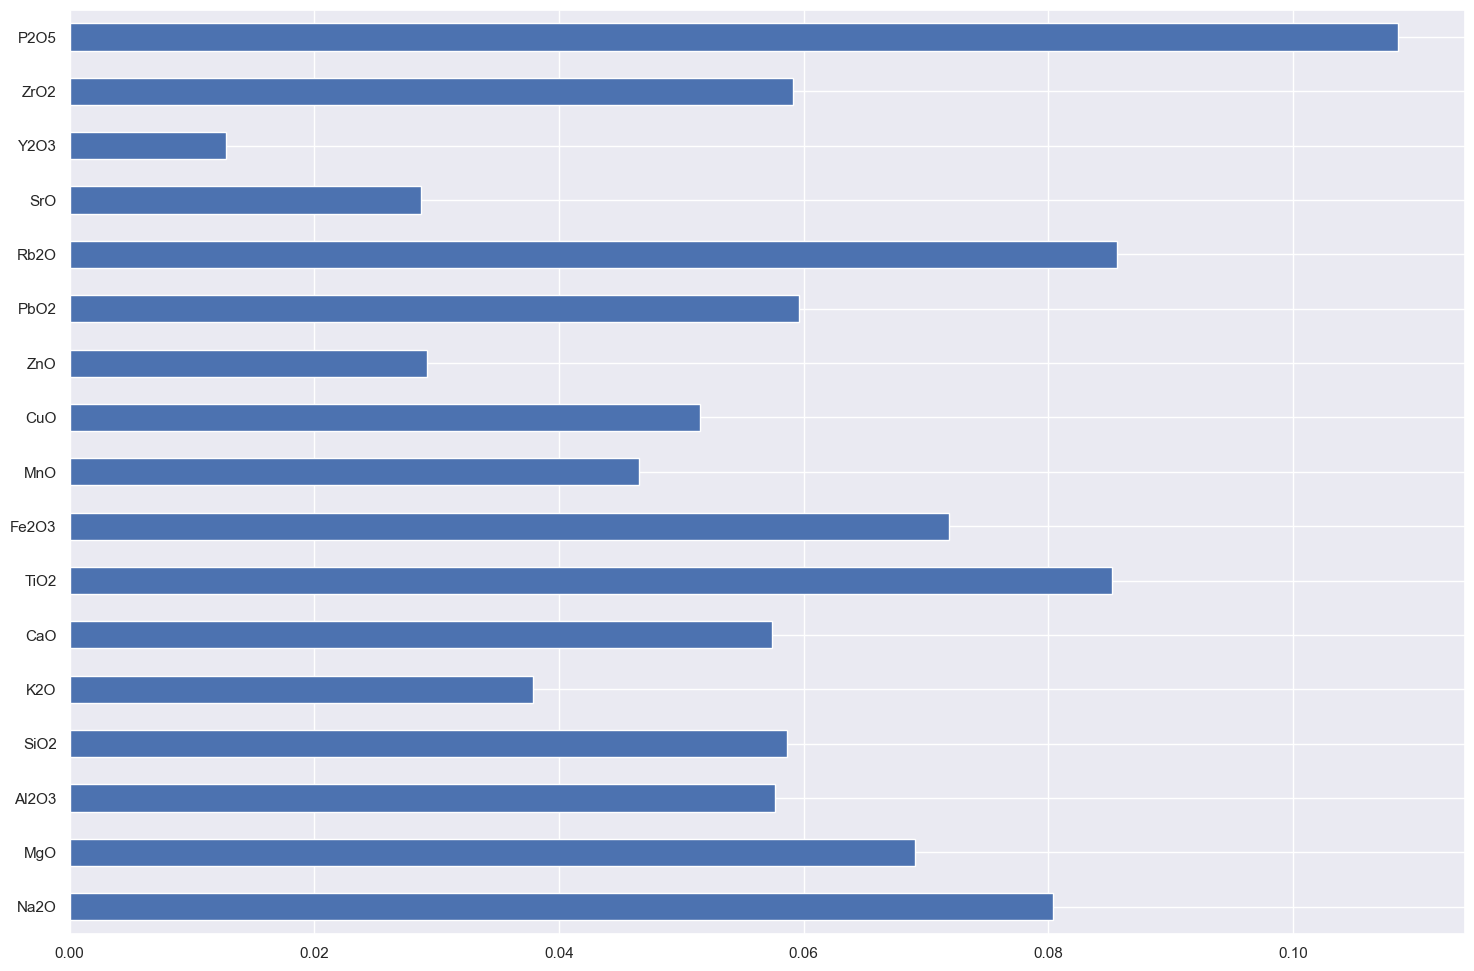

DY_type_Y


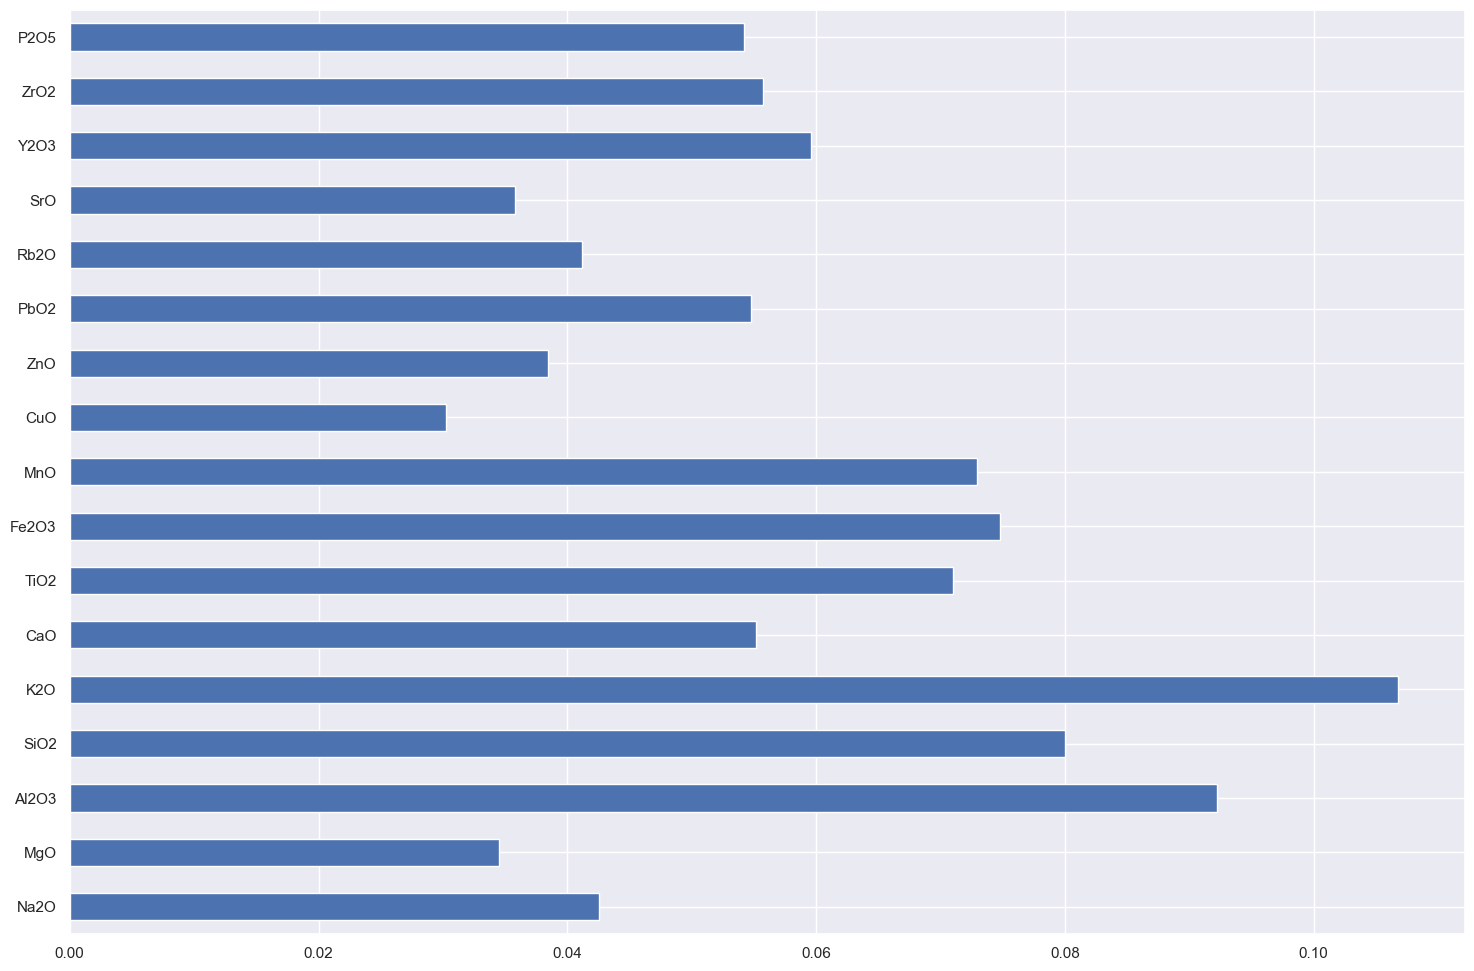

In [13]:
from sklearn.ensemble import RandomForestClassifier

X=df1[['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'Fe2O3', 'MnO','CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5']]

for i in ['Part','is_DY', 'isFLQ', 'num', 'postfix', 'DY_type_BS', 'DY_type_M', 'DY_type_NS','DY_type_QC', 'DY_type_Y']:
    Y=df1[i]
    cls = RandomForestClassifier(max_depth=20, random_state=0)
    cls.fit(X, Y)
    feat_importances = pd.Series(cls.feature_importances_, index=X.columns)
    feat_importances.plot(kind='barh')
    print(i)
    plt.show()

Вариант проекции в 2d плоскость с учетом знаний о среднем и дисперсии данных (тк данные устойчивые к выбросам и не надо делать Robust)

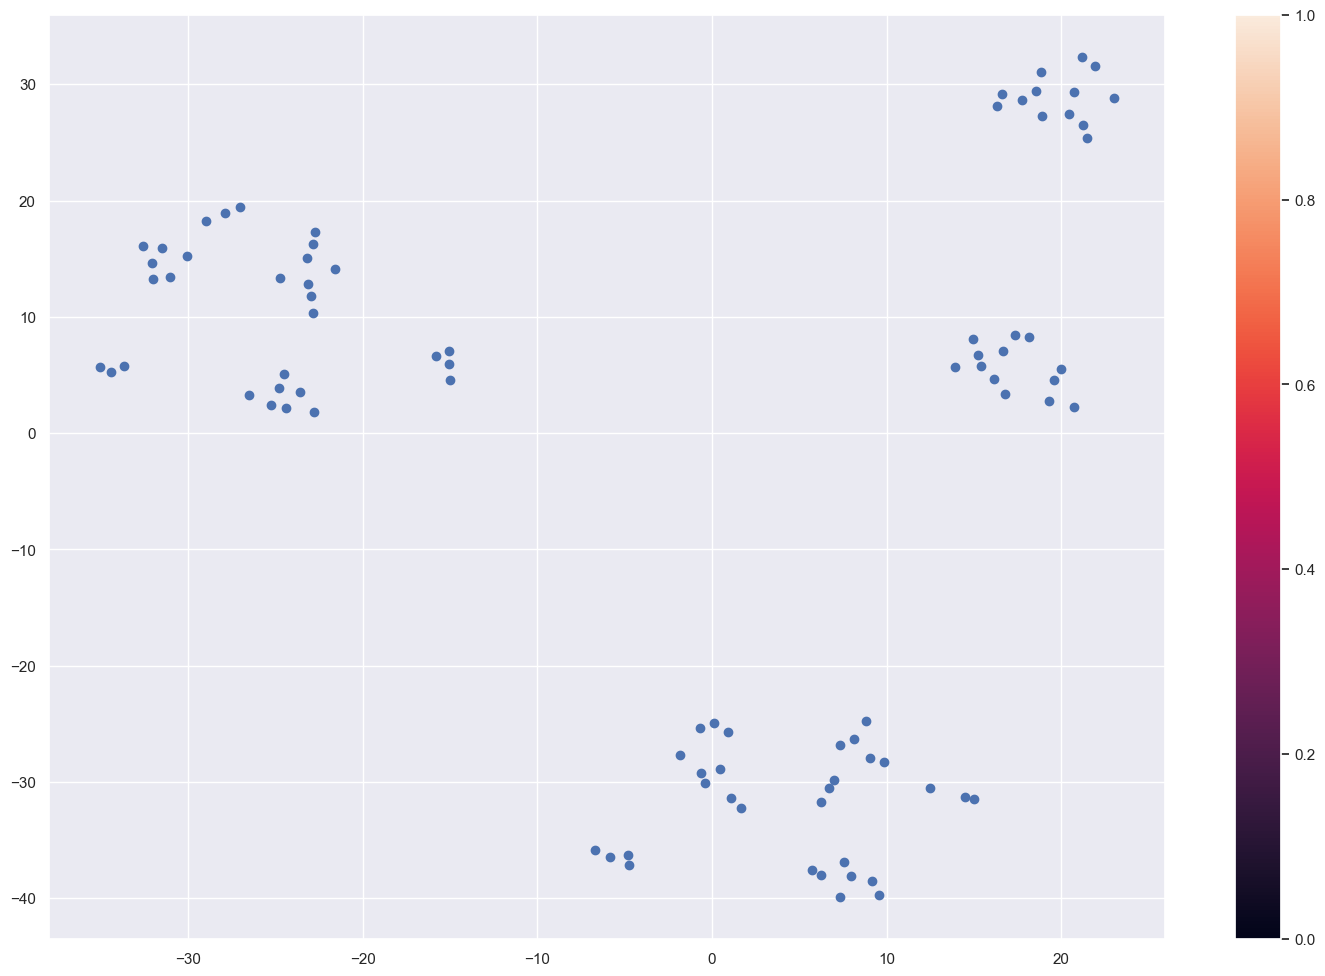

In [14]:
class StandardScaler:
    def __init__(self):
        self.mean=None
        self.std =None
    def fit(self,X):
        self.mean= np.mean(X,axis=0)
        self.std= np.std(X,axis=0)
        return self
    def transform(self, X):
        return (X-self.mean)/self.std

    def fit_transform(self, X):
        return self.fit(X).transform(X)
        

from sklearn.manifold import TSNE
sc = StandardScaler()
df_new = sc.fit_transform(df1)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=6.0)
X_embedded = tsne.fit_transform(df_new)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.colorbar()
plt.show()

# KMEANS++
## Инициализация первого центроида случайным выбором из X_train
## Инициализация оставшихся центроидов с K-means++
## Основной цикл кластеризации: распределение точек по ближайшим центроидам, просчет расстояния, обновление центроидов на новые и проверка сходимости

## Используем Силуэт как метрика качества кластеризации - Сначала определяется отдельно для каждого объекта в выборке:
– среднее расстояние от данного объекта до объектов из того же кластера
– среднее расстояние от данного объекта до объектов из ближайшего кластера

Силуэт выборки – средняя величина силуэтов объектов данной выборки, показывает, насколько среднее расстояние до объектов своего
кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне [-1, 1], близкие к -1 – плохая (разрозненная) кластеризация, близкие к нулю - кластеры пересекаются и накладываются друг на друга, близкие к 1 - "плотные" четко выделенные кластеры.

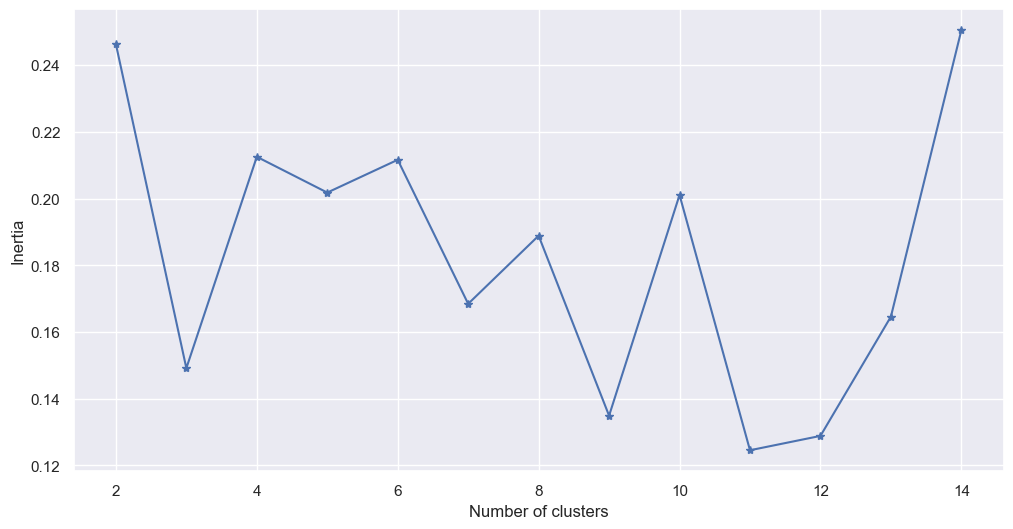

In [15]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(22)
from numpy.random import uniform
import random


def euclidean(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X_train):
        initial_idx = np.random.randint(X_train.shape[0])
        self.centroids = [X_train[initial_idx]]

        for _ in range(1, self.n_clusters):
            dists = np.array([min([np.sum((x - centroid) ** 2) for centroid in self.centroids]) for x in X_train])
            probabilities = dists / np.sum(dists)
            new_centroid_idx = np.random.choice(X_train.shape[0], p=probabilities)
            self.centroids.append(X_train[new_centroid_idx])

        for iteration in range(self.max_iter):
            clusters = {i: [] for i in range(self.n_clusters)}
            
            for x in X_train:
                distances = euclidean(x, np.array(self.centroids))
                closest_centroid_idx = np.argmin(distances)
                clusters[closest_centroid_idx].append(x)
            
            prev_centroids = self.centroids.copy()
            for i in range(self.n_clusters):
                if clusters[i]:
                    self.centroids[i] = np.mean(clusters[i], axis=0)
                else:
                    self.centroids[i] = prev_centroids[i]

            if np.allclose(self.centroids, prev_centroids):
                break

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            distances = euclidean(x, np.array(self.centroids))
            centroid_idx = np.argmin(distances)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    

from sklearn.metrics import silhouette_score

data = df_new.to_numpy()

metrics = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    class_centers, labels = kmeans.evaluate(data)
    metrics.append(silhouette_score(data,labels))
frame = pd.DataFrame({'Cluster':range(2,15), 'metrics':metrics})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['metrics'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## Посмотрели на рекомендованное количество кластеров по метрике
идем дальше и показываем как выглядит

0.21969974523726696


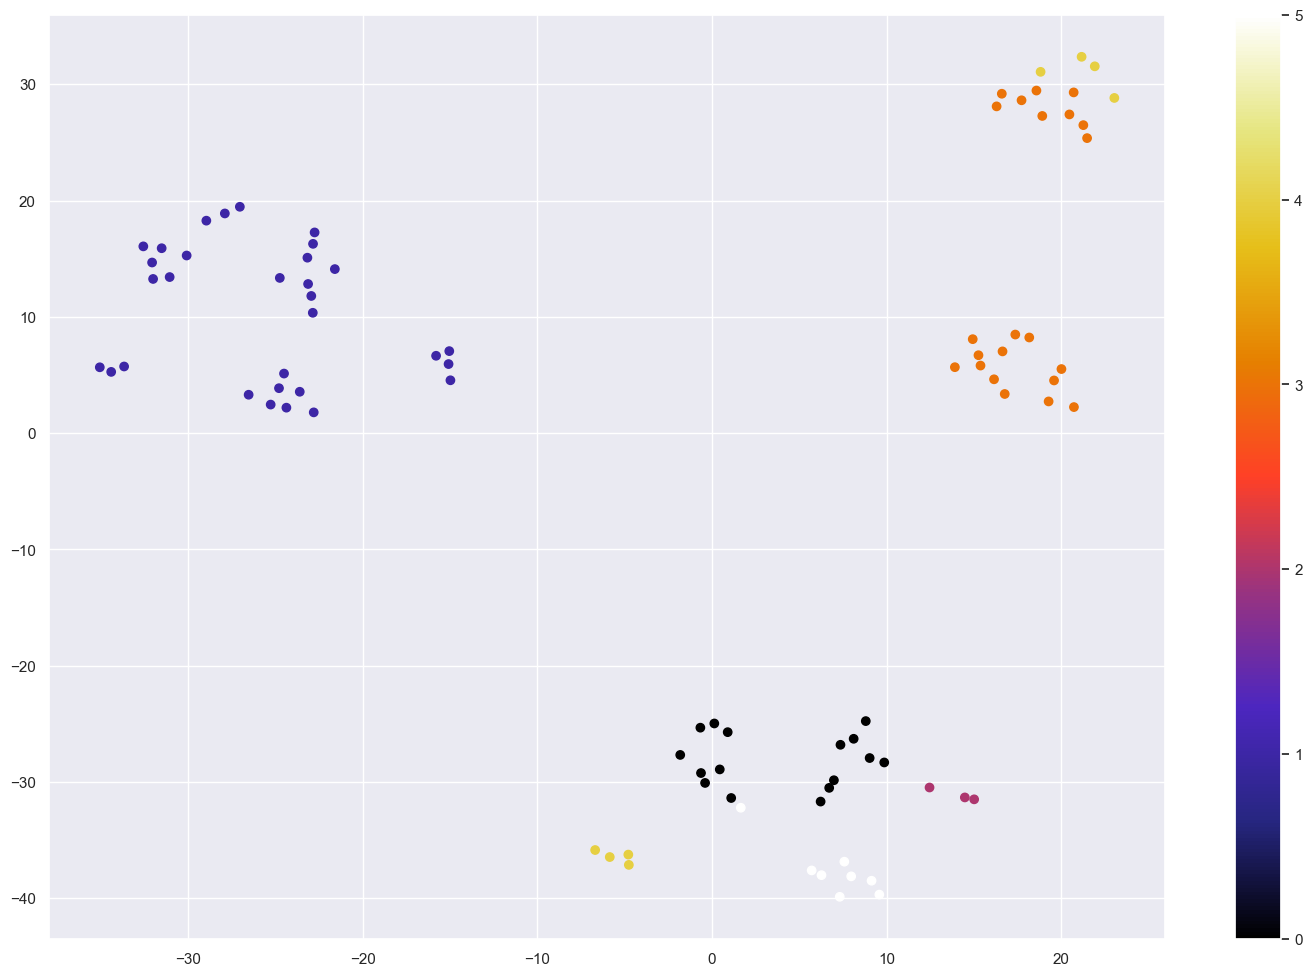

In [63]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
print(silhouette_score(data,labels))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=labels,cmap='CMRmap')
plt.colorbar()
plt.show()

0.23822595613823677


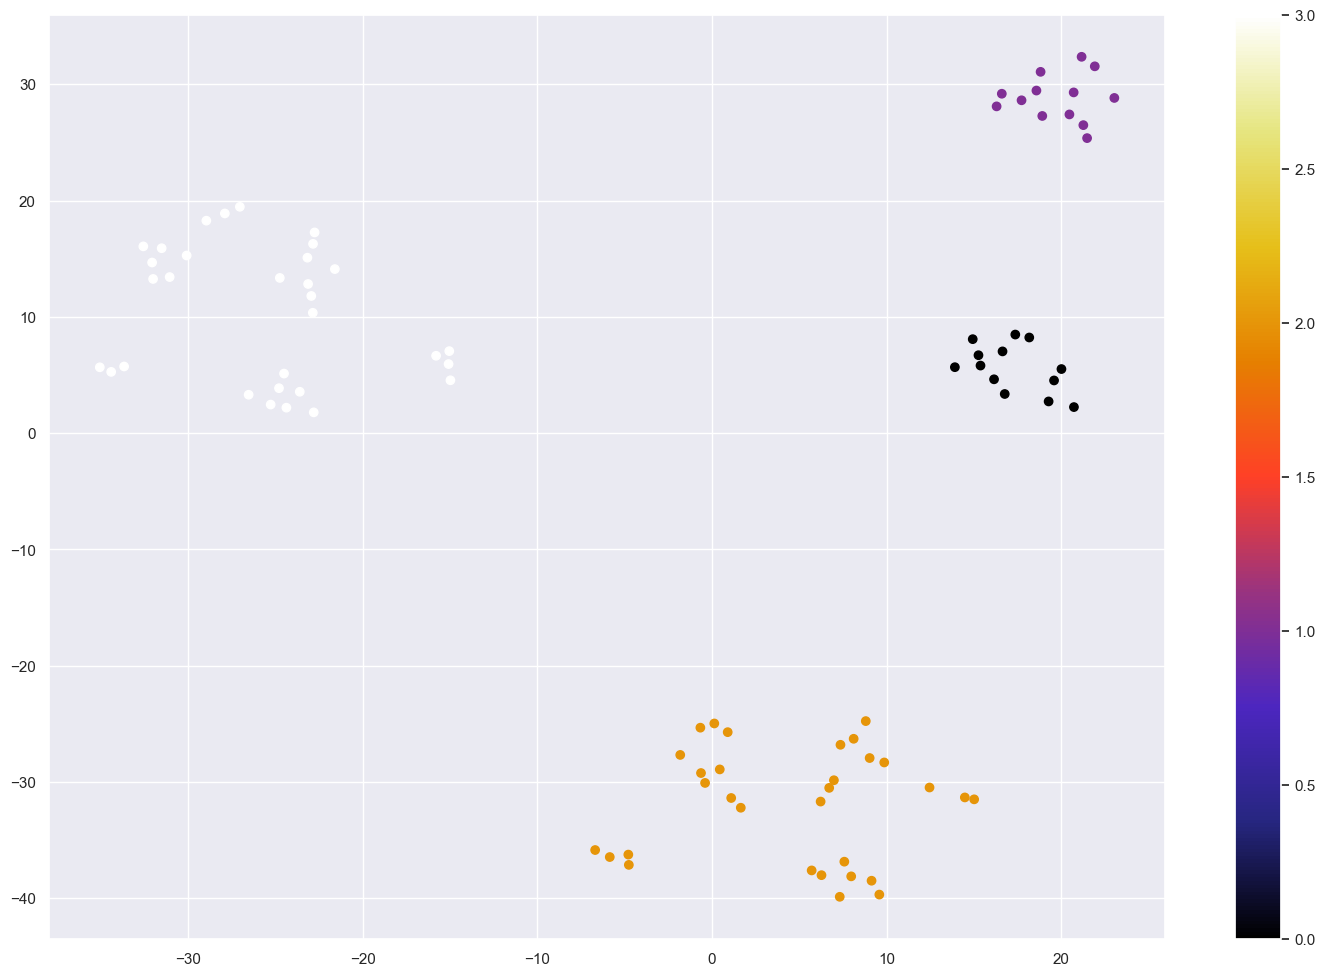

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
print(silhouette_score(data,labels))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=labels,cmap='CMRmap')
plt.colorbar()
plt.show()

0.2661091861128864


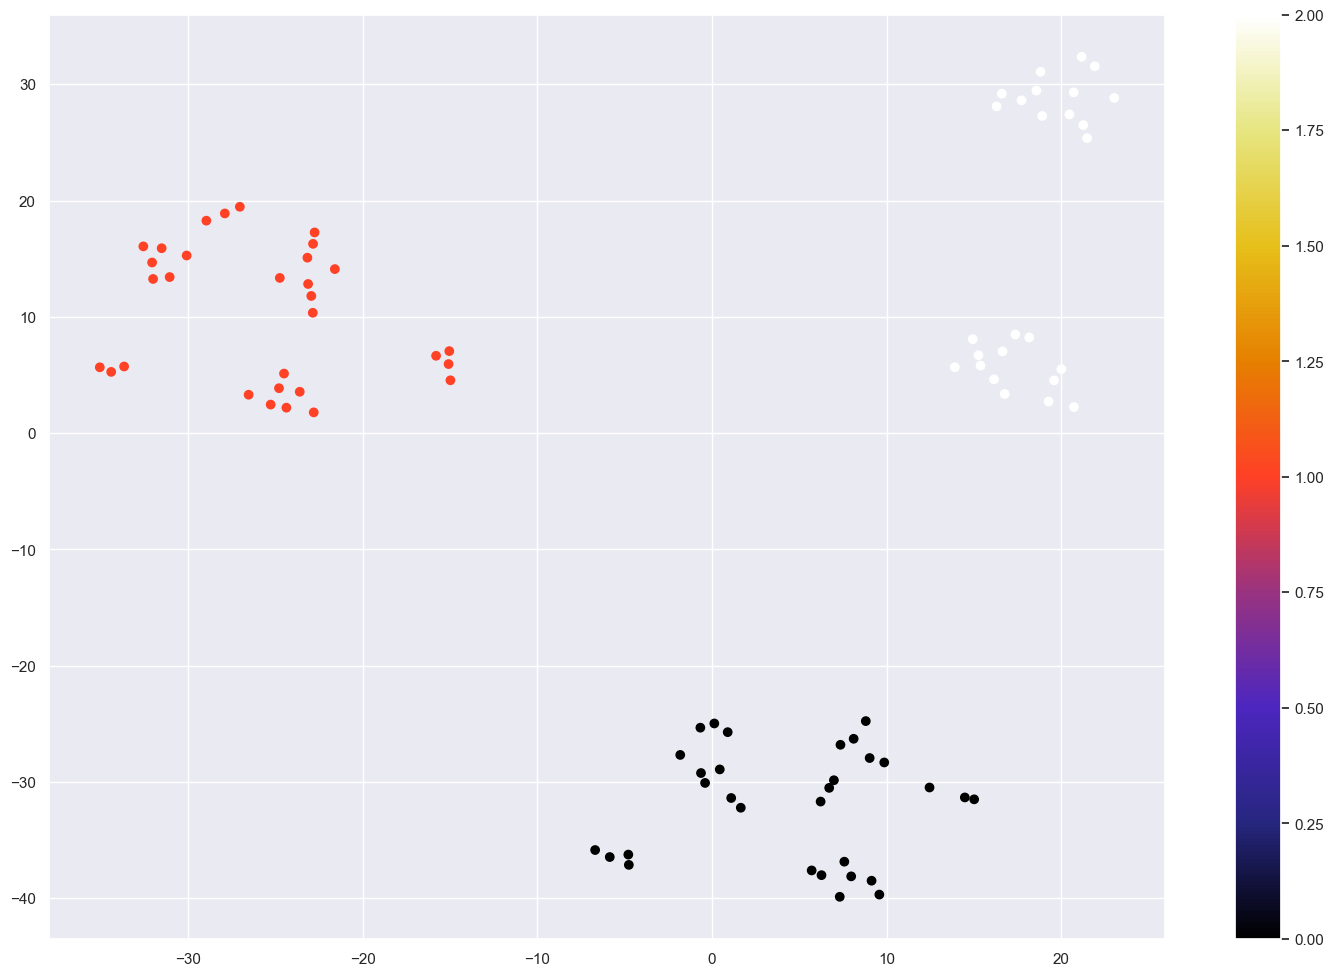

In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
print(silhouette_score(data,labels))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=labels,cmap='CMRmap')
plt.colorbar()
plt.show()

0.2462997826972175


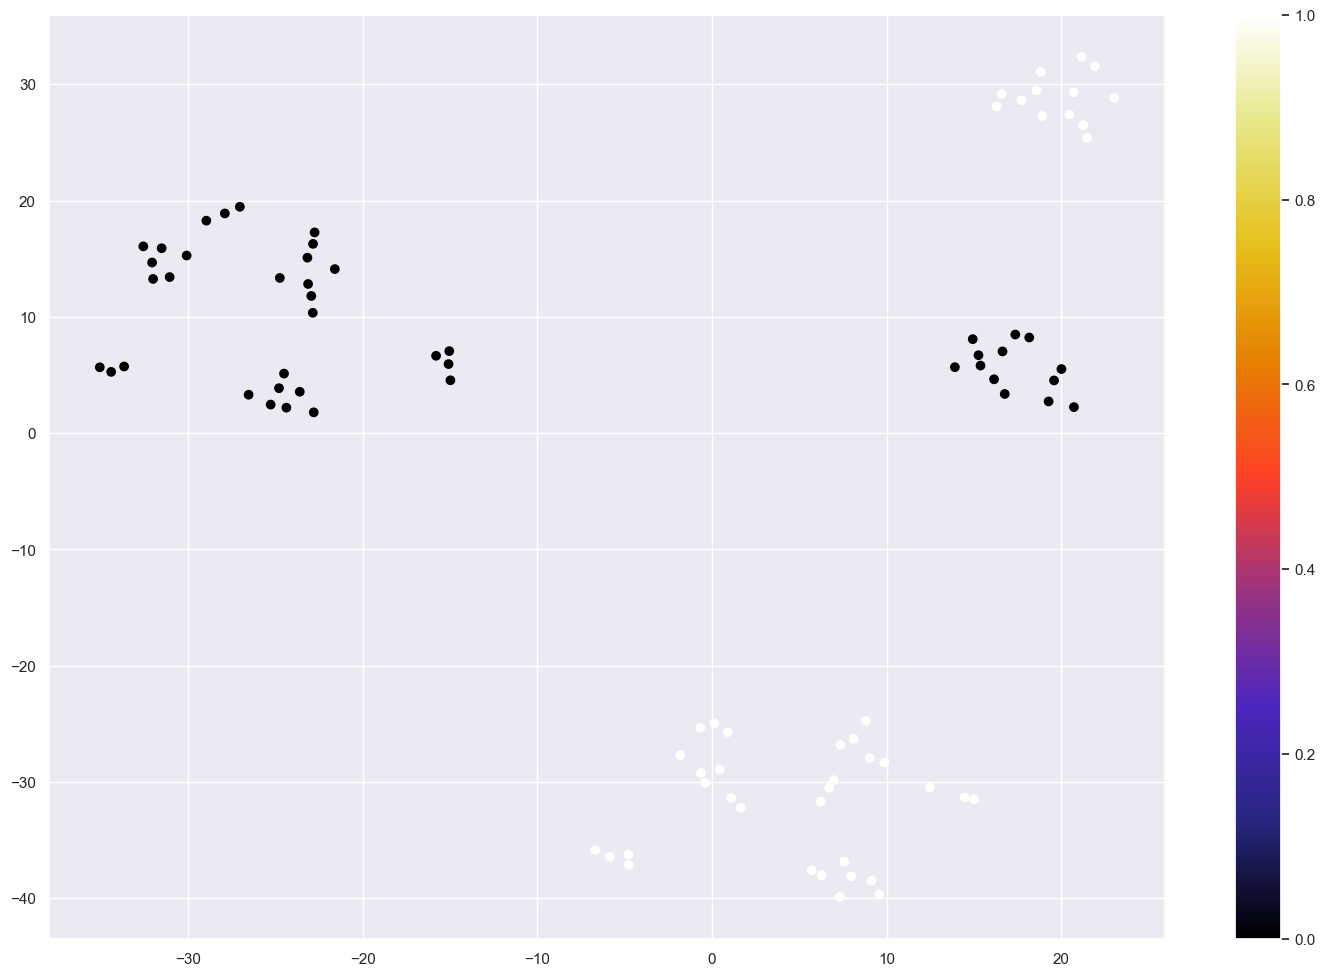

In [69]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
print(silhouette_score(data,labels))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=labels,cmap='CMRmap')
plt.colorbar()
plt.show()

## Алгоритм DBSCAN – непомеченные, счетчик кластеров
Пока
Взять случайную точку
Если , то
• Пометить как, возможно, шумовой
Иначе
• Создать новый кластер ,
• Для всех , не помеченных или шумовых
• Если, то иначе пометить как граничную точку
кластера для всех

Конструктор инициализирует DBSCAN с входными data, epsilon (eps) и минимальным количеством точек.
Затем он применяет t-Distributed Stochastic Neighbor Embedding для уменьшения размерности входных данных до 2D. Этот шаг часто используется в задачах визуализации для снижения размерности высокоразмерных данных с сохранением локальной структуры.
Метод distance вычисляет евклидово расстояние между двумя точками x и y.
region_query находит все точки в эпсилон-окрестности заданной точки p. Он использует структуру данных cKDTree (структура для быстрого поиска ближайших соседей в многомерном пространстве. Она используется для решения задач, связанных с поиском ближайших точек или точек в определенном радиусе от данной точки).
add_points_to_cluster добавляет точку p и ее соседей в новый кластер.
add_to_cluster рекурсивно расширяет кластер, добавляя его соседей, если они удовлетворяют условиям плотности.
Fit перебирает каждую точку в наборе данных, проверяет, была ли она уже назначена кластеру, если нет, расширяет новый, если он удовлетворяет условиям плотности.

В целом это более гибкая реализация DBSCAN

In [112]:
from sklearn.manifold import TSNE
from scipy.spatial import cKDTree

class DBSCAN():
    def __init__(self, data, eps=10, m=3):
        tsne = TSNE(n_components=2, perplexity=6.0)
        self.data_2d = tsne.fit_transform(data)
        self.eps = eps
        self.m = m
        self.noise = 0
        self.C = 0
        self.clusters = {0: []}
        self.tree = cKDTree(self.data_2d)

    def distance(self, x, y):
        return np.linalg.norm(x - y)

    def region_query(self, p):
        return self.tree.query_ball_point(p, self.eps)

    def add_points_to_cluster(self, p, neighbours):
        self.clusters[self.C] = [p]
        self.add_to_cluster(neighbours)

    def add_to_cluster(self, neighbours):
        while neighbours:
            q_idx = neighbours.pop()
            q = self.data_2d[q_idx]
            new_neighbours = self.region_query(q)
            if len(new_neighbours) > self.m:
                self.add_to_cluster(new_neighbours)
            if not any(q in cluster for cluster in self.clusters.values()):
                self.clusters[self.C].append(q)

    def fit(self):
        for i, p in enumerate(self.data_2d):
            if any(np.array_equal(p, cluster_point) for cluster in self.clusters.values() for cluster_point in cluster):
                continue
            neighbours = self.region_query(p)
            if len(neighbours) < self.m:
                self.clusters[0].append(p)
            else:
                self.C += 1
                self.add_points_to_cluster(p, neighbours)
        return self.clusters

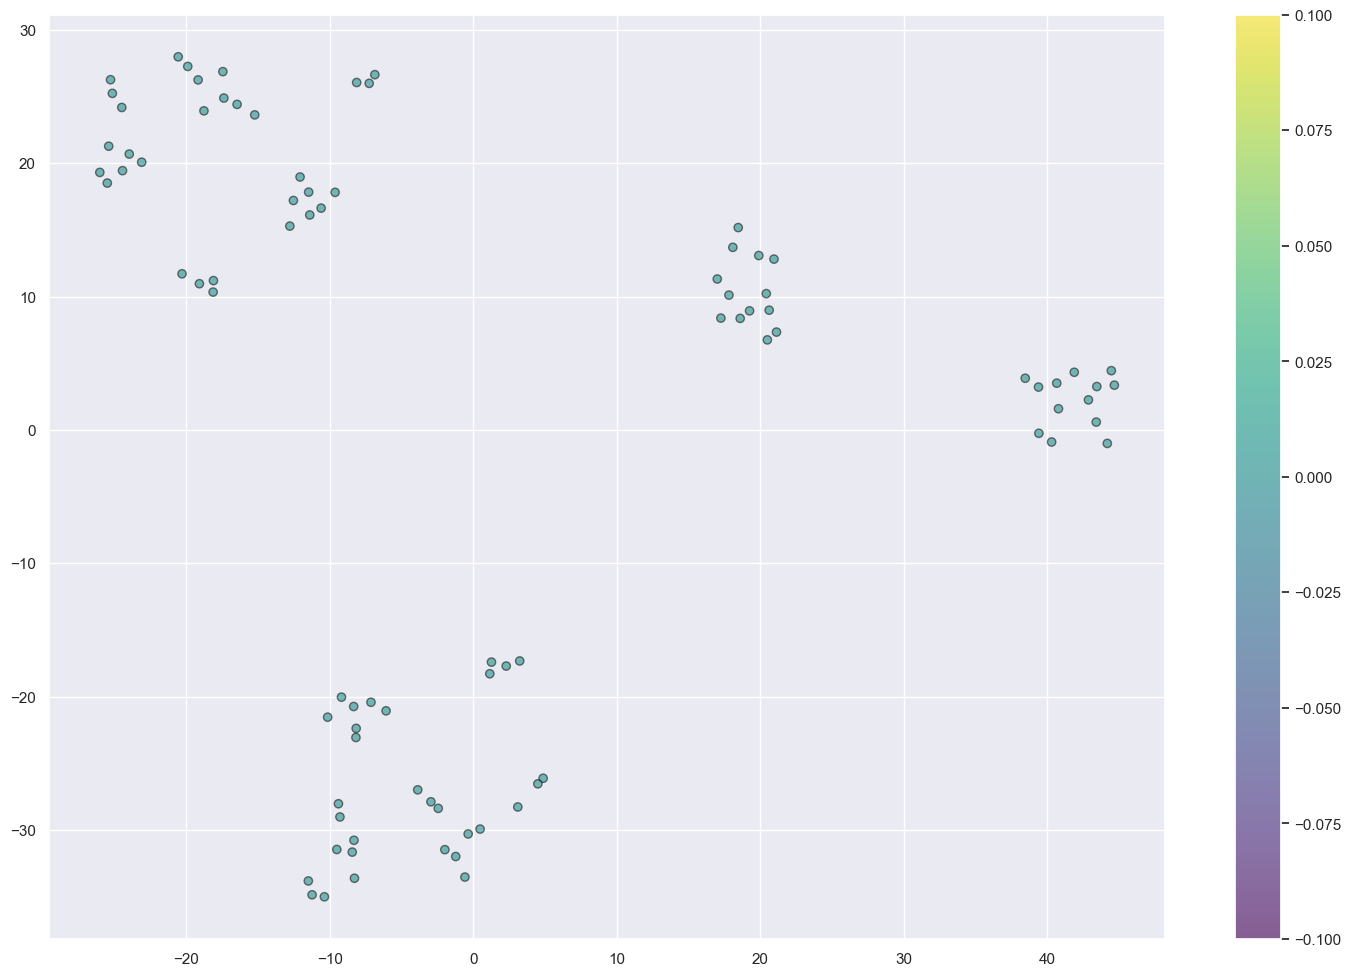

In [113]:
dbscan = DBSCAN(data=data, eps=0.5, m=2)
dbscan.fit()
clusters = dbscan.clusters

# Визуализация
labels = np.full(len(data), -1, dtype=int)
for cluster_id, points in clusters.items():
    for point in points:
        idx = np.where(np.all(dbscan.data_2d == point, axis=1))[0][0]
        labels[idx] = cluster_id

plt.scatter(dbscan.data_2d[:, 0], dbscan.data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar()
plt.show()

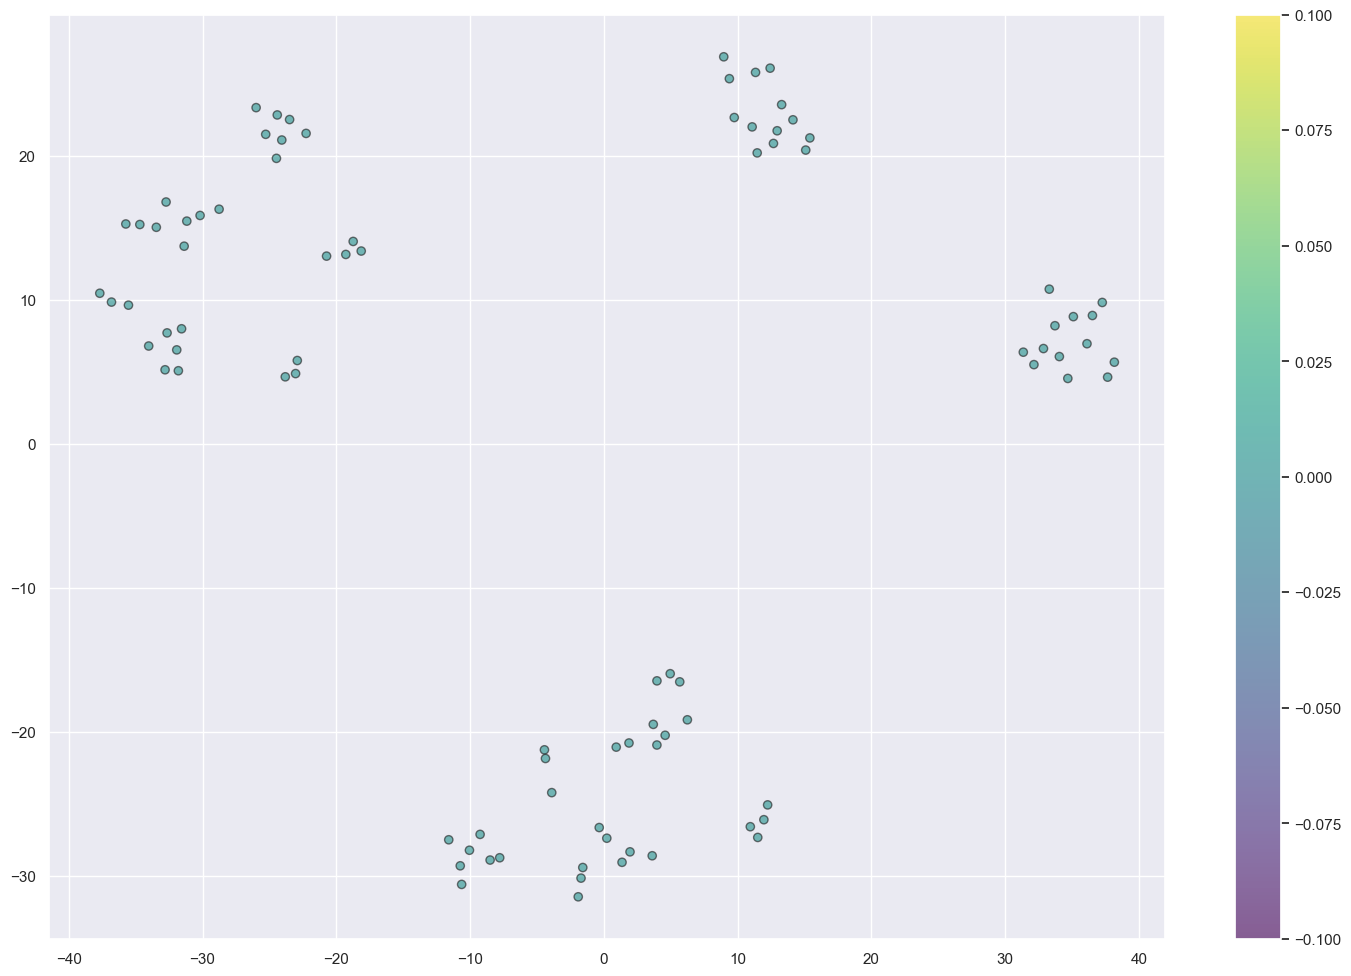

In [114]:
dbscan = DBSCAN(data=data, eps=0.5, m=2)
dbscan.fit()
clusters = dbscan.clusters

# Визуализация
labels = np.full(len(data), -1, dtype=int)
for cluster_id, points in clusters.items():
    for point in points:
        idx = np.where(np.all(dbscan.data_2d == point, axis=1))[0][0]
        labels[idx] = cluster_id

plt.scatter(dbscan.data_2d[:, 0], dbscan.data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar()
plt.show()

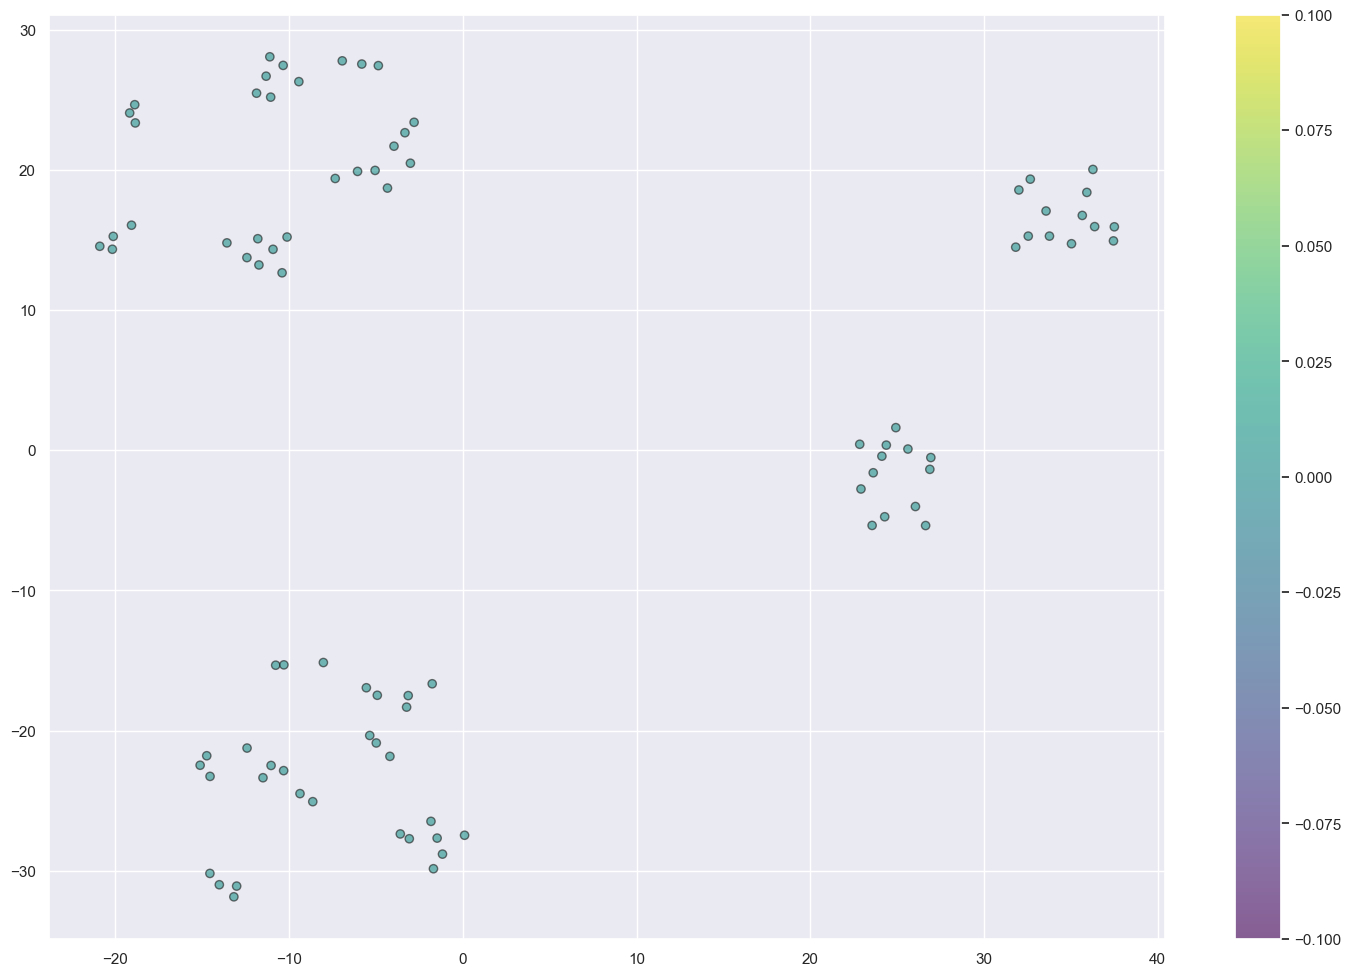

In [115]:
dbscan = DBSCAN(data=data, eps=0.5, m=4)
dbscan.fit()
clusters = dbscan.clusters

# Визуализация
labels = np.full(len(data), -1, dtype=int)
for cluster_id, points in clusters.items():
    for point in points:
        idx = np.where(np.all(dbscan.data_2d == point, axis=1))[0][0]
        labels[idx] = cluster_id

plt.scatter(dbscan.data_2d[:, 0], dbscan.data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar()
plt.show()

# DBSCAN красиво делит все пространство точек на кластеры и получаем разные преобразования в кластеры

## Как итог можно сказать, что явно определяется 4 разделимых кластера возможных керамик из разных компонентов и связей. Данное исследование может помочь производителю быстрее принимать решение или экспериментировать над новым соединениями в рамках улучшения перформанса керамики